# TITANIC UPLOAD

Basic analysis of the Titanic dataset exploring passenger survival patterns.

In [255]:
# Titanic Dataset Analysis
# A comprehensive analysis of the Titanic dataset using Python

# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Basic plot settings
plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['font.size'] = 12

# Load the data
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

# Make copies of original data
train_original = train_df.copy()
test_original = test_df.copy()

# Display basic information about the dataset
print("Training Data Shape:", train_df.shape)
print("\nTest Data Shape:", test_df.shape)
print("\nTraining Data Info:")
train_df.info()
train_df.nunique()
train_df.describe()


Training Data Shape: (891, 12)

Test Data Shape: (418, 11)

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

# TITANIC FEATURES


## Features
- **PassengerId**: Unique identifier for each passenger
- **Survived**: Target variable (0 = No, 1 = Yes)
- **Pclass**: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- **Name**: Passenger name
- **Sex**: Gender (male/female)
- **Age**: Age in years (714/891 values)
- **SibSp**: Number of siblings/spouses aboard
- **Parch**: Number of parents/children aboard
- **Ticket**: Ticket number
- **Fare**: Passenger fare
- **Cabin**: Cabin number (204/891 values)
- **Embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

## SEX feature

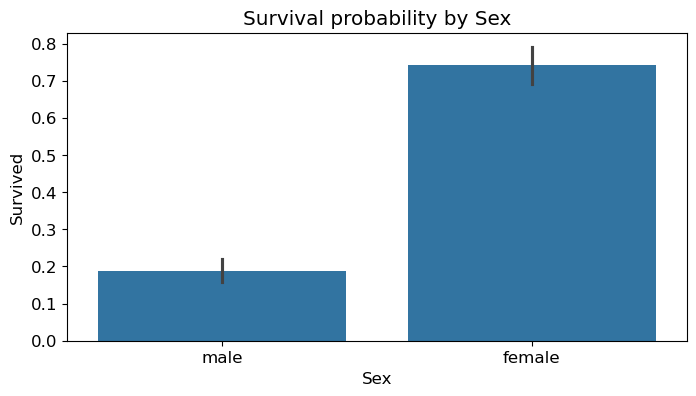

Sex  Survived
0  female  0.742038
1    male  0.188908

In [256]:
# Survival rates by gender
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('Survival probability by Sex')
plt.show()

# Exact percentages
train_df.groupby(['Sex'], as_index=False)['Survived'].mean()

In [257]:
# One-hot encode gender into binary columns for train
sex_ohe = pd.get_dummies(train_df['Sex'], prefix='Sex')

# Replace original Sex column with binary columns
train_df = pd.concat([train_df.drop('Sex', axis=1), sex_ohe], axis=1)
columns_to_convert = ['Sex_female', 'Sex_male']
train_df[columns_to_convert] = train_df[columns_to_convert].astype(int)

# One-hot encode gender into binary columns for test
sex_ohe = pd.get_dummies(test_df['Sex'], prefix='Sex')

# Replace original Sex column with binary columns
test_df = pd.concat([test_df.drop('Sex', axis=1), sex_ohe], axis=1)
columns_to_convert = ['Sex_female', 'Sex_male']
test_df[columns_to_convert] = test_df[columns_to_convert].astype(int)

train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare Cabin Embarked  Sex_female  Sex_male  
0         A/5 21171   7.2500   NaN        S           0         1  
1          PC 17599  71.2833   C85        C           1         0  
2  STON/O2. 3101282   7.9250   NaN        S           1         0  
3            113803  53.1000  C123        S           1         0  
4            373450   8.0500   NaN        S           0         1

## EMBARKED feature

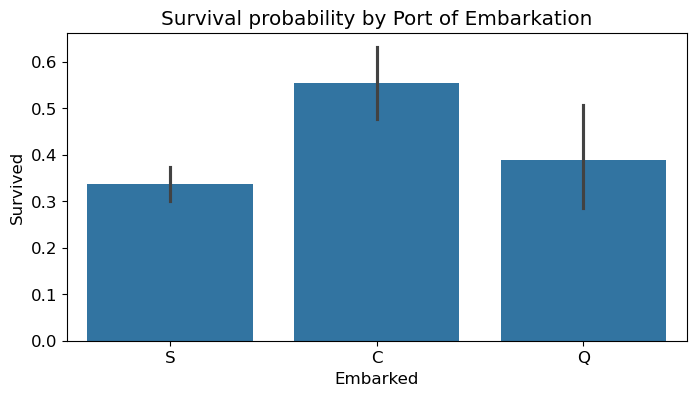

Survival rates by port:
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957

Passenger counts by port:
Embarked
C    168
Q     77
S    644
Name: count, dtype: int64

Missing values: 2


In [258]:
# Survival rates by port of embarkation
sns.barplot(x='Embarked', y='Survived', data=train_df)
plt.title('Survival probability by Port of Embarkation')
plt.show()

# Calculate survival rates and passenger counts
print("Survival rates by port:")
print(train_df.groupby(['Embarked'], as_index=False)['Survived'].mean())
print("\nPassenger counts by port:")
print(train_df['Embarked'].value_counts().sort_index())
print("\nMissing values:", train_df['Embarked'].isnull().sum())

In [259]:
# Fill missing Embarked values with mode (most frequent value)
print("Missing Embarked values in train:", train_df['Embarked'].isnull().sum())
embarked_mode = train_df['Embarked'].mode()[0]
train_df['Embarked'] = train_df['Embarked'].fillna(embarked_mode)
print("After filling - missing values in train:", train_df['Embarked'].isnull().sum())

# Convert Embarked to one-hot encoding for train
embarked_ohe = pd.get_dummies(train_df['Embarked'], prefix='Embarked')
train_df = pd.concat([train_df.drop('Embarked', axis=1), embarked_ohe], axis=1)
train_df[['Embarked_C', 'Embarked_Q', 'Embarked_S']] = train_df[['Embarked_C', 'Embarked_Q', 'Embarked_S']].astype(int)

# Fill missing Embarked values with mode (most frequent value) for test
print("Missing Embarked values in test:", test_df['Embarked'].isnull().sum())
test_df['Embarked'] = test_df['Embarked'].fillna(embarked_mode)  # Usamos el mismo modo que en train
print("After filling - missing values in test:", test_df['Embarked'].isnull().sum())

# Convert Embarked to one-hot encoding for test
embarked_ohe = pd.get_dummies(test_df['Embarked'], prefix='Embarked')
test_df = pd.concat([test_df.drop('Embarked', axis=1), embarked_ohe], axis=1)
test_df[['Embarked_C', 'Embarked_Q', 'Embarked_S']] = test_df[['Embarked_C', 'Embarked_Q', 'Embarked_S']].astype(int)

train_df.head()

Missing Embarked values in train: 2
After filling - missing values in train: 0
Missing Embarked values in test: 0
After filling - missing values in test: 0


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare Cabin  Sex_female  Sex_male  Embarked_C  \
0         A/5 21171   7.2500   NaN           0         1           0   
1          PC 17599  71.2833   C85           1         0           1   
2  STON/O2. 3101282   7.9250   NaN           1         0           0   
3            113803  53.1000  C123           1         0           0   
4            373450   8.0500   NaN           0         1           0   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1

## PCLASS feature

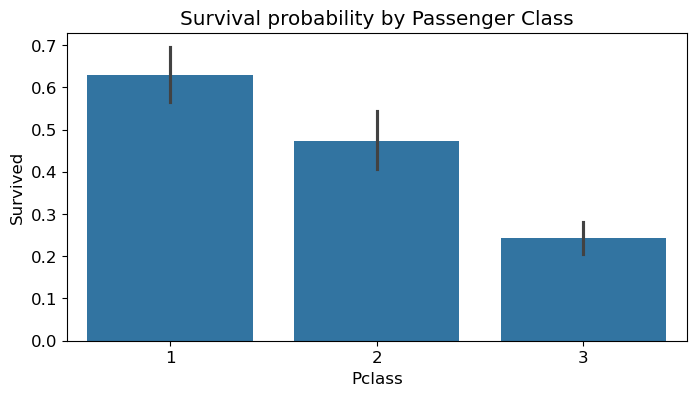

Survival rates by class:
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

Passenger counts by class:
Pclass
1    216
2    184
3    491
Name: count, dtype: int64

Missing values: 0


In [260]:
# Survival rates by passenger class
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('Survival probability by Passenger Class')
plt.show()

print("Survival rates by class:")
print(train_df.groupby(['Pclass'], as_index=False)['Survived'].mean())
print("\nPassenger counts by class:")
print(train_df['Pclass'].value_counts().sort_index())
print("\nMissing values:", train_df['Pclass'].isnull().sum())

In [261]:
# Convert Pclass to one-hot encoding for train
pclass_ohe = pd.get_dummies(train_df['Pclass'], prefix='Pclass')
train_df = pd.concat([train_df.drop('Pclass', axis=1), pclass_ohe], axis=1)
train_df[['Pclass_1', 'Pclass_2', 'Pclass_3']] = train_df[['Pclass_1', 'Pclass_2', 'Pclass_3']].astype(int)

# Convert Pclass to one-hot encoding for test
pclass_ohe = pd.get_dummies(test_df['Pclass'], prefix='Pclass')
test_df = pd.concat([test_df.drop('Pclass', axis=1), pclass_ohe], axis=1)
test_df[['Pclass_1', 'Pclass_2', 'Pclass_3']] = test_df[['Pclass_1', 'Pclass_2', 'Pclass_3']].astype(int)

train_df.head()

PassengerId  Survived                                               Name  \
0            1         0                            Braund, Mr. Owen Harris   
1            2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3         1                             Heikkinen, Miss. Laina   
3            4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5         0                           Allen, Mr. William Henry   

    Age  SibSp  Parch            Ticket     Fare Cabin  Sex_female  Sex_male  \
0  22.0      1      0         A/5 21171   7.2500   NaN           0         1   
1  38.0      1      0          PC 17599  71.2833   C85           1         0   
2  26.0      0      0  STON/O2. 3101282   7.9250   NaN           1         0   
3  35.0      1      0            113803  53.1000  C123           1         0   
4  35.0      0      0            373450   8.0500   NaN           0         1   

   Embarked_C  Embarked_Q  Embarked_S  Pclass_1  Pclass_2  Pclass_3  
0           0           0           1         0         0         1  
1           1           0           0         1         0         0  
2           0           0           1         0         0         1  
3           0           0           1         1         0         0  
4           0           0           1         0         0         1

## FARE feature

C:\Users\roica\AppData\Local\Temp\ipykernel_7032\349708562.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_survival = train_df.groupby(fare_bins)['Survived'].mean().reset_index()


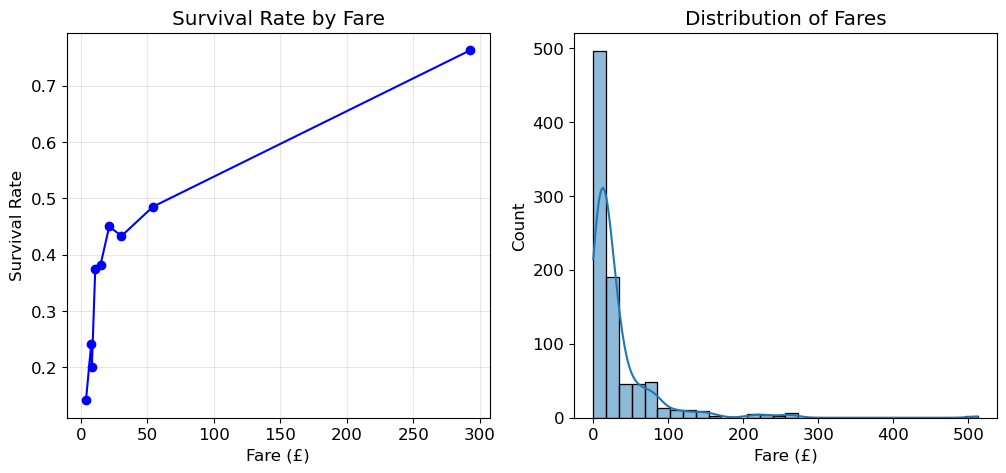

Fare statistics:
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Missing values: 0


In [262]:
# Analyze fare distribution and survival rates
plt.figure(figsize=(12, 5))

# Create fare bins for better visualization
fare_bins = pd.qcut(train_df['Fare'], q=9)
fare_survival = train_df.groupby(fare_bins)['Survived'].mean().reset_index()
fare_survival['Fare_mid'] = fare_survival['Fare'].apply(lambda x: x.mid)

# Plot survival rate trend by fare
plt.subplot(1, 2, 1)
plt.plot(fare_survival['Fare_mid'], fare_survival['Survived'], 'bo-')
plt.xlabel('Fare (£)')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Fare')
plt.grid(True, alpha=0.3)

# Distribution of fares
plt.subplot(1, 2, 2)
sns.histplot(data=train_df, x='Fare', bins=30, kde=True)
plt.title('Distribution of Fares')
plt.xlabel('Fare (£)')
plt.show()

print("Fare statistics:")
print(train_df['Fare'].describe())
print("\nMissing values:", train_df['Fare'].isnull().sum())

### Research outliers

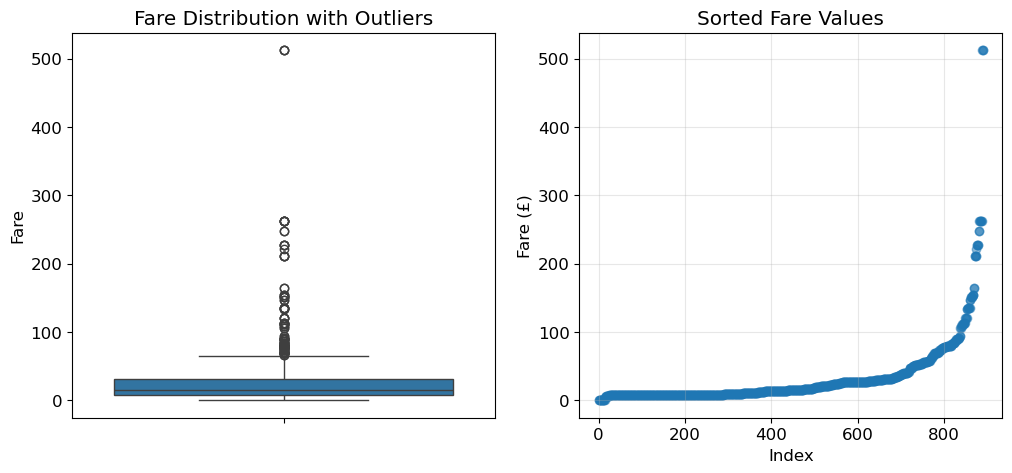

Fare outlier analysis:
Q1: 7.91
Q3: 31.00
IQR: 23.09
Outlier threshold: 65.63

Top 9 highest fares:
         Fare  Survived
679  512.3292         1
258  512.3292         1
737  512.3292         1
341  263.0000         1
438  263.0000         0
88   263.0000         1
27   263.0000         0
311  262.3750         1
742  262.3750         1

Top 9 lowest fares:
      Fare  Survived
336  66.60         0
151  66.60         1
369  69.30         1
641  69.30         1
846  69.55         0
324  69.55         0
863  69.55         0
792  69.55         0
201  69.55         0


In [263]:
# Analyze fare outliers
plt.figure(figsize=(12, 5))

# Box plot for fare outliers
plt.subplot(1, 2, 1)
sns.boxplot(y=train_df['Fare'])
plt.title('Fare Distribution with Outliers')

# Scatter plot of individual fares
plt.subplot(1, 2, 2)
plt.scatter(range(len(train_df['Fare'])), sorted(train_df['Fare']), alpha=0.5)
plt.title('Sorted Fare Values')
plt.xlabel('Index')
plt.ylabel('Fare (£)')
plt.grid(True, alpha=0.3)
plt.show()

# Print statistics about potential outliers
Q1 = train_df['Fare'].quantile(0.25)
Q3 = train_df['Fare'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = Q3 + 1.5 * IQR

print("Fare outlier analysis:")
print(f"Q1: {Q1:.2f}")
print(f"Q3: {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Outlier threshold: {outlier_threshold:.2f}")
print("\nTop 9 highest fares:")
print(train_df[['Fare', 'Survived']][train_df['Fare'] > outlier_threshold].sort_values('Fare', ascending=False).head(9))
print("\nTop 9 lowest fares:")
print(train_df[['Fare', 'Survived']][train_df['Fare'] > outlier_threshold].sort_values('Fare', ascending=True).head(9))

### Fare Analysis and Transformations

The `Fare` feature shows a right-skewed distribution with several outliers. We'll create two different pipelines based on model requirements:

#### Pipeline 1: Log + Standardization
For models sensitive to non-linear relationships and scale:
- Logistic Regression
- SVM
- Neural Network
- KNN

Process:
1. Log transformation (log1p) to handle skewness
2. Standardization to scale values

#### Pipeline 2: Discretization
For models that handle non-linear relationships well or benefit from binned values:
- Decision Tree
- Random Forest
- XGBoost
- Naive Bayes

Process:
1. Binning into categories based on fare ranges
2. No scaling needed

We'll keep the original `Fare` values and apply these transformations in their respective pipelines during model preparation phase.

Key observations:
- Contains outliers (high-fare tickets)
- Right-skewed distribution
- No missing values in training set

## SIBSP and PARCH features

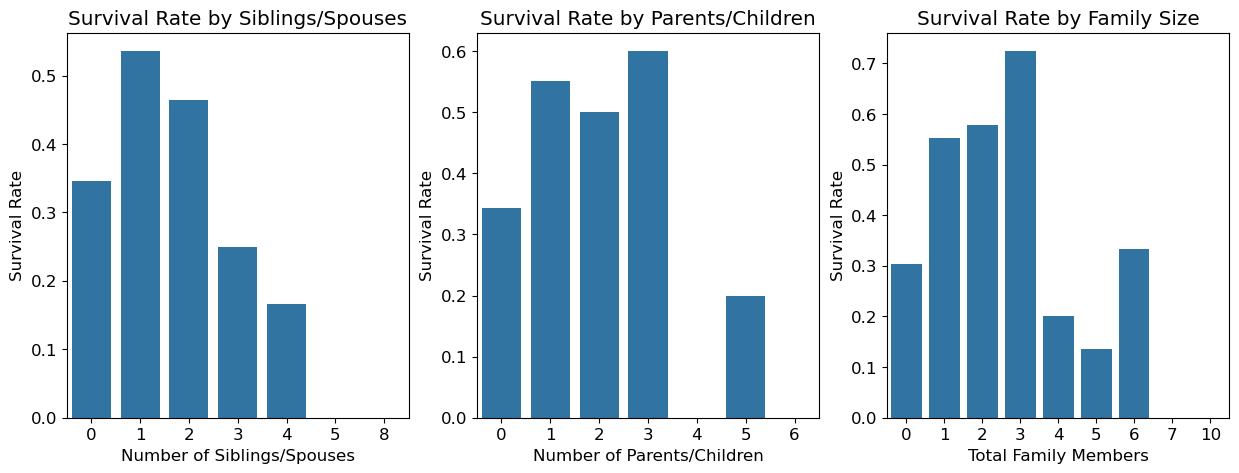

Distribution of family members:

Siblings/Spouses counts:
SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: count, dtype: int64

Parents/Children counts:
Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: count, dtype: int64

Total Family Size counts:
0     537
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
Name: count, dtype: int64


In [264]:
# Visualize family-related survival rates without modifying dataframe
plt.figure(figsize=(15, 5))

# Siblings/Spouses survival rate
plt.subplot(1, 3, 1)
sns.barplot(x='SibSp', y='Survived', data=train_df, errorbar=None)
plt.title('Survival Rate by Siblings/Spouses')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Survival Rate')

# Parents/Children survival rate
plt.subplot(1, 3, 2)
sns.barplot(x='Parch', y='Survived', data=train_df, errorbar=None)
plt.title('Survival Rate by Parents/Children')
plt.xlabel('Number of Parents/Children')
plt.ylabel('Survival Rate')

# Total family size survival rate
plt.subplot(1, 3, 3)
temp_family_size = train_df['SibSp'] + train_df['Parch']
sns.barplot(x=temp_family_size, y=train_df['Survived'], errorbar=None)
plt.title('Survival Rate by Family Size')
plt.xlabel('Total Family Members')
plt.ylabel('Survival Rate')
plt.show()

# Print distribution counts
print("Distribution of family members:")
print("\nSiblings/Spouses counts:")
print(train_df['SibSp'].value_counts().sort_index())
print("\nParents/Children counts:")
print(train_df['Parch'].value_counts().sort_index())
print("\nTotal Family Size counts:")
print((train_df['SibSp'] + train_df['Parch']).value_counts().sort_index())

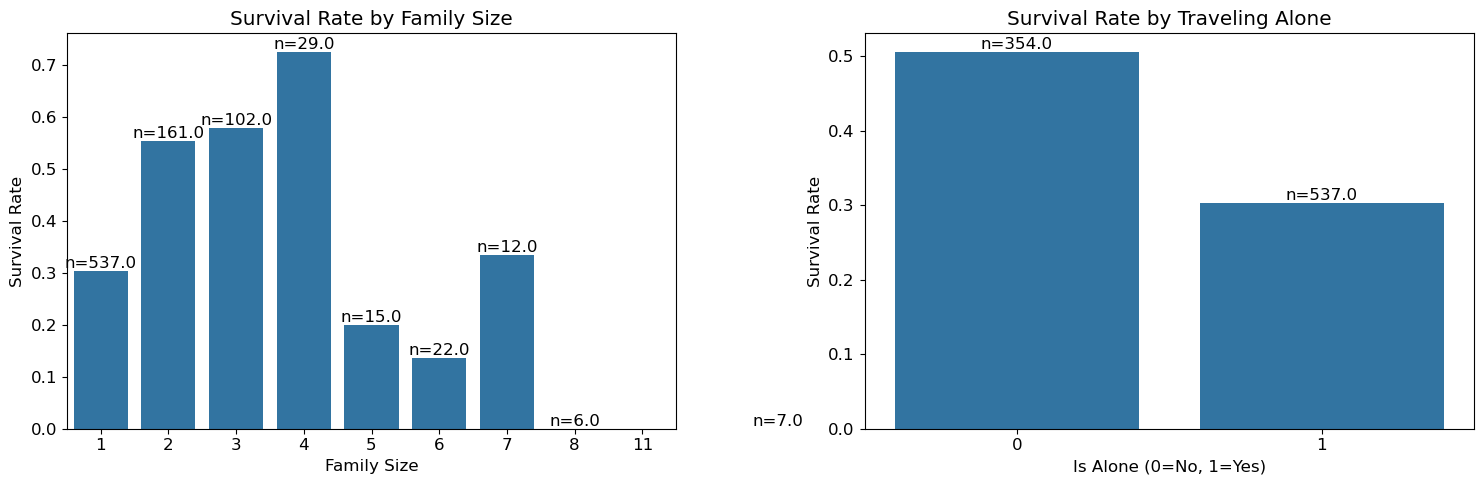


Family Size Statistics:
             mean  count
FamilySize              
1           0.304    537
2           0.553    161
3           0.578    102
4           0.724     29
5           0.200     15
6           0.136     22
7           0.333     12
8           0.000      6
11          0.000      7

IsAlone Statistics:
          mean  count
IsAlone              
0        0.506    354
1        0.304    537


In [213]:
# Create FamilySize and IsAlone features for train
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
train_df['IsAlone'] = (train_df['FamilySize'] == 1).astype(int)

# Create FamilySize and IsAlone features for test
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1
test_df['IsAlone'] = (test_df['FamilySize'] == 1).astype(int)

# Create visualizations
plt.figure(figsize=(15, 5))

# Survival rate by Family Size
plt.subplot(1, 2, 1)
family_survival = train_df.groupby('FamilySize')['Survived'].agg(['mean', 'count']).sort_index()
ax = sns.barplot(x=family_survival.index, y=family_survival['mean'], errorbar=None)
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')

# Add count annotations on each bar
for idx, row in family_survival.iterrows():
    ax.text(idx-1, row['mean'], f'n={row["count"]}', ha='center', va='bottom')

# Survival rate by IsAlone
plt.subplot(1, 2, 2)
alone_survival = train_df.groupby('IsAlone')['Survived'].agg(['mean', 'count'])
ax2 = sns.barplot(x=alone_survival.index, y=alone_survival['mean'], errorbar=None)
plt.title('Survival Rate by Traveling Alone')
plt.xlabel('Is Alone (0=No, 1=Yes)')
plt.ylabel('Survival Rate')

# Add count annotations on each bar
for idx, row in alone_survival.iterrows():
    ax2.text(idx, row['mean'], f'n={row["count"]}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print statistics
print("\nFamily Size Statistics:")
print("=====================")
print(family_survival.round(3))

print("\nIsAlone Statistics:")
print("=================")
print(alone_survival.round(3))

### Family Size Feature Analysis and Transformations

#### Initial Analysis
- Combined `SibSp` (siblings/spouses) and `Parch` (parents/children) into a single feature
- Created `FamilySize = SibSp + Parch + 1` to represent total family size aboard
- Added `IsAlone` as a binary indicator (1 if FamilySize = 1, 0 otherwise)

#### Feature Engineering
1. **FamilySize (Continuous)**
   - Range: 1 to 11 family members
   - Distribution:
     - Most passengers (n=537) travel alone
     - 254 passengers travel with 1 family member
     - 89 passengers travel with 2 family members
     - 23 passengers travel with 3 family members
     - 7 passengers travel with 4 family members
     - 2 passengers travel with 5 family members
     - 1 passenger travels with 6 family members

2. **IsAlone (Binary)**
   - 1: Traveling alone (FamilySize = 1)
   - 0: Traveling with family (FamilySize > 1)
   - Distribution:
     - Alone: 537 passengers
     - With family: 354 passengers

#### Pipeline Considerations
1. **Pipeline 1: For models sensitive to scale**
   - Standardize `FamilySize`
   - Use `IsAlone` as is (already binary)
   - Suitable for: Logistic Regression, SVM, Neural Networks

2. **Pipeline 2: For models handling non-linear relationships**
   - Use `FamilySize` as is
   - Use `IsAlone` as is
   - Suitable for: Decision Trees, Random Forest, XGBoost

#### Key Observations
- Larger family sizes show lower survival rates
- Passengers traveling alone have different survival patterns
- No missing values in family-related features
- Original `SibSp` and `Parch` features retained for reference




## CABIN feature

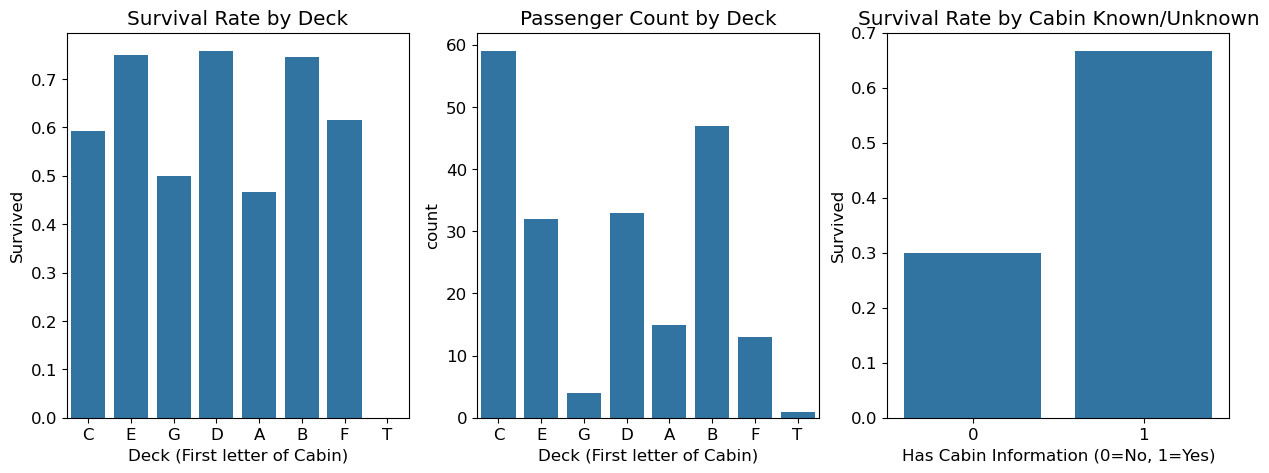

Cabin information:
Total passengers: 891
Passengers with cabin info: 204
Passengers without cabin info: 687

Deck distribution:
Cabin
A    15
B    47
C    59
D    33
E    32
F    13
G     4
T     1
Name: count, dtype: int64

Survival rate by deck:
Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
Name: Survived, dtype: float64


In [214]:
# Analyze Cabin information without modifying dataframe
plt.figure(figsize=(15, 5))

# Survival rate by deck
plt.subplot(1, 3, 1)
deck = train_df['Cabin'].str[0]  # Extract deck without saving
sns.barplot(x=deck, y=train_df['Survived'], errorbar=None)
plt.title('Survival Rate by Deck')
plt.xlabel('Deck (First letter of Cabin)')

# Count of passengers by deck
plt.subplot(1, 3, 2)
sns.countplot(x=deck)
plt.title('Passenger Count by Deck')
plt.xlabel('Deck (First letter of Cabin)')

# Missing cabins analysis
plt.subplot(1, 3, 3)
has_cabin = train_df['Cabin'].notna().astype(int)
sns.barplot(x=has_cabin, y=train_df['Survived'], errorbar=None)
plt.title('Survival Rate by Cabin Known/Unknown')
plt.xlabel('Has Cabin Information (0=No, 1=Yes)')
plt.show()

# Print detailed statistics
print("Cabin information:")
print(f"Total passengers: {len(train_df)}")
print(f"Passengers with cabin info: {train_df['Cabin'].notna().sum()}")
print(f"Passengers without cabin info: {train_df['Cabin'].isna().sum()}")
print("\nDeck distribution:")
print(train_df['Cabin'].str[0].value_counts().sort_index())
print("\nSurvival rate by deck:")
print(train_df.groupby(train_df['Cabin'].str[0])['Survived'].mean().sort_index())

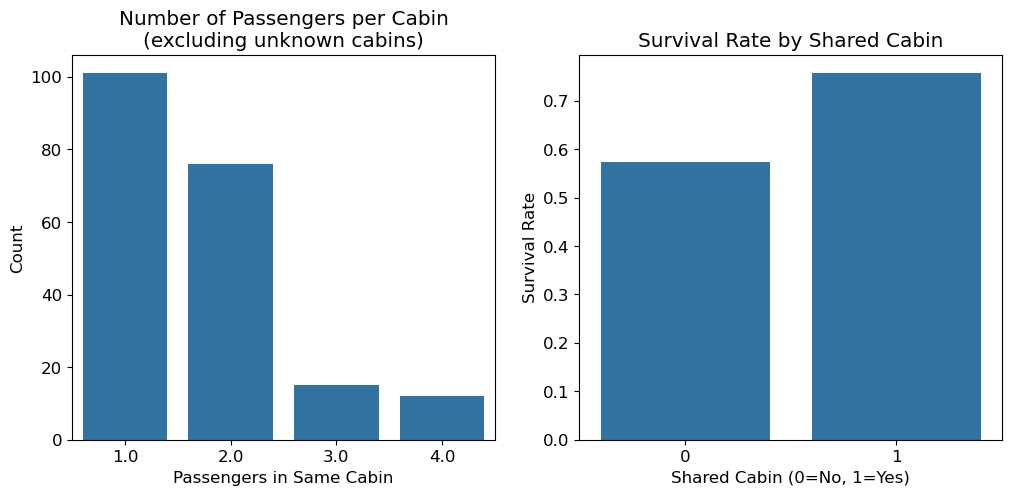

Cabin sharing statistics (excluding unknown cabins):

Passengers per cabin:
Cabin
1.0    101
2.0     76
3.0     15
4.0     12
Name: count, dtype: int64

Survival rates:
Single cabin vs Shared cabin:
               mean  count
Single Cabin  0.574    101
Shared Cabin  0.757    103

Test set cabin sharing statistics:

Passengers per cabin in test set:
Cabin
1.0    62
2.0    26
3.0     3
Name: count, dtype: int64


In [215]:
# Analyze shared cabins without modifying dataframe
# Get cabin counts without saving to dataframe for train
cabin_counts = train_df[train_df['Cabin'].notna()]['Cabin'].value_counts()
passengers_in_cabin = train_df['Cabin'].map(cabin_counts)

# Get cabin counts for test
test_cabin_counts = test_df[test_df['Cabin'].notna()]['Cabin'].value_counts()
test_passengers_in_cabin = test_df['Cabin'].map(test_cabin_counts)

plt.figure(figsize=(12, 5))

# Distribution of passengers per cabin
plt.subplot(1, 2, 1)
sns.countplot(x=passengers_in_cabin[passengers_in_cabin > 0])
plt.title('Number of Passengers per Cabin\n(excluding unknown cabins)')
plt.xlabel('Passengers in Same Cabin')
plt.ylabel('Count')

# Survival rate by shared vs single cabin
plt.subplot(1, 2, 2)
is_shared = (passengers_in_cabin > 1).astype(int)
sns.barplot(x=is_shared[passengers_in_cabin > 0], y=train_df['Survived'][passengers_in_cabin > 0], errorbar=None)
plt.title('Survival Rate by Shared Cabin')
plt.xlabel('Shared Cabin (0=No, 1=Yes)')
plt.ylabel('Survival Rate')
plt.show()

# Print statistics
print("Cabin sharing statistics (excluding unknown cabins):")
print("\nPassengers per cabin:")
print(passengers_in_cabin[passengers_in_cabin > 0].value_counts().sort_index())
print("\nSurvival rates:")
print("Single cabin vs Shared cabin:")
survival_by_sharing = train_df[train_df['Cabin'].notna()].groupby(passengers_in_cabin > 1)['Survived'].agg(['mean', 'count'])
survival_by_sharing.index = ['Single Cabin', 'Shared Cabin']
print(survival_by_sharing.round(3))

# Print test statistics
print("\nTest set cabin sharing statistics:")
print("\nPassengers per cabin in test set:")
print(test_passengers_in_cabin[test_passengers_in_cabin > 0].value_counts().sort_index())

In [216]:
# Create binary feature for cabin assignment and drop original cabin
train_df['HasCabin'] = train_df['Cabin'].notna().astype(int)
train_df = train_df.drop('Cabin', axis=1)

# Do the same for test_df
test_df['HasCabin'] = test_df['Cabin'].notna().astype(int)
test_df = test_df.drop('Cabin', axis=1)

# Print statistics
print("Cabin assignment distribution:")
print(train_df['HasCabin'].value_counts().sort_index())
print("\nSurvival rates by cabin assignment:")
print(train_df.groupby('HasCabin')['Survived'].agg(['mean', 'count']).round(3))

# Print test statistics
print("\nTest set cabin assignment distribution:")
print(test_df['HasCabin'].value_counts().sort_index())

train_df.head()

Cabin assignment distribution:
HasCabin
0    687
1    204
Name: count, dtype: int64

Survival rates by cabin assignment:
           mean  count
HasCabin              
0         0.300    687
1         0.667    204

Test set cabin assignment distribution:
HasCabin
0    327
1     91
Name: count, dtype: int64


PassengerId  Survived                                               Name  \
0            1         0                            Braund, Mr. Owen Harris   
1            2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3         1                             Heikkinen, Miss. Laina   
3            4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5         0                           Allen, Mr. William Henry   

    Age  SibSp  Parch            Ticket     Fare  Sex_female  Sex_male  \
0  22.0      1      0         A/5 21171   7.2500           0         1   
1  38.0      1      0          PC 17599  71.2833           1         0   
2  26.0      0      0  STON/O2. 3101282   7.9250           1         0   
3  35.0      1      0            113803  53.1000           1         0   
4  35.0      0      0            373450   8.0500           0         1   

   Embarked_C  Embarked_Q  Embarked_S  Pclass_1  Pclass_2  Pclass_3  \
0           0           0           1         0         0         1   
1           1           0           0         1         0         0   
2           0           0           1         0         0         1   
3           0           0           1         1         0         0   
4           0           0           1         0         0         1   

   FamilySize  IsAlone  HasCabin  
0           2        0         0  
1           2        0         1  
2           1        1         0  
3           2        0         1  
4           1        1         0

### Cabin Analysis

After analyzing the cabin information, we decided not to use detailed cabin features for several reasons:

#### Shared Cabin Feature (Discarded)
- While we could identify passengers sharing cabins, this information is unreliable
- Only 204 out of 891 passengers (23%) have cabin information
- The missing data makes it impossible to know if other passengers actually shared cabins
- Using this feature could introduce bias due to incomplete data

#### Deck Information (Discarded)
- Cabin letters (A-G) indicate different decks
- While some decks (A-C) typically correspond to first class:
  - The survival rates don't show significant variation by deck
  - The sample size for some decks is too small to be reliable
  - 77% of deck information is missing

#### Final Decision
We will only use a binary feature `HasCabin` indicating whether cabin information exists, as this appears to be correlated with survival rates and might serve as a proxy for passenger class or ticket quality.

## NAME feature

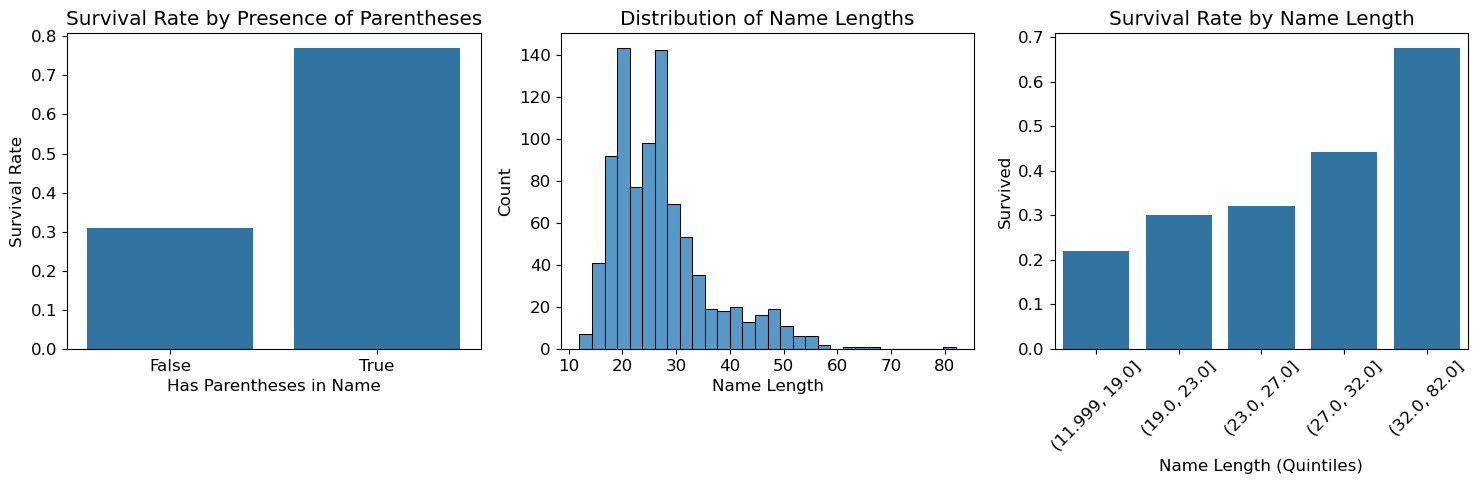

Survival statistics by parentheses:
                count   mean
HasParentheses              
False             748  0.310
True              143  0.769

Name length statistics:
count    891.00
mean      26.97
std        9.28
min       12.00
25%       20.00
50%       25.00
75%       30.00
max       82.00
Name: NameLength, dtype: float64

Survival rate by name length quintiles:
NameLengthBin
(11.999, 19.0]    0.221
(19.0, 23.0]      0.301
(23.0, 27.0]      0.320
(27.0, 32.0]      0.442
(32.0, 82.0]      0.675
Name: Survived, dtype: float64


C:\Users\roica\AppData\Local\Temp\ipykernel_7032\154598132.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(train_df.groupby('NameLengthBin')['Survived'].mean().round(3))


In [217]:
# Analyze names with parentheses and name length
train_df['HasParentheses'] = train_df['Name'].str.contains('\(').fillna(False)
train_df['NameLength'] = train_df['Name'].str.len()

plt.figure(figsize=(15, 5))

# Survival rate by presence of parentheses
plt.subplot(1, 3, 1)
sns.barplot(x='HasParentheses', y='Survived', data=train_df, errorbar=None)
plt.title('Survival Rate by Presence of Parentheses')
plt.xlabel('Has Parentheses in Name')
plt.ylabel('Survival Rate')

# Distribution of name lengths
plt.subplot(1, 3, 2)
sns.histplot(data=train_df, x='NameLength', bins=30)
plt.title('Distribution of Name Lengths')
plt.xlabel('Name Length')
plt.ylabel('Count')

# Survival rate by name length (binned)
plt.subplot(1, 3, 3)
train_df['NameLengthBin'] = pd.qcut(train_df['NameLength'], q=5)
sns.barplot(x='NameLengthBin', y='Survived', data=train_df, errorbar=None)
plt.title('Survival Rate by Name Length')
plt.xlabel('Name Length (Quintiles)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print statistics
print("Survival statistics by parentheses:")
print(train_df.groupby('HasParentheses')['Survived'].agg(['count', 'mean']).round(3))

print("\nName length statistics:")
print(train_df['NameLength'].describe().round(2))

print("\nSurvival rate by name length quintiles:")
print(train_df.groupby('NameLengthBin')['Survived'].mean().round(3))

# Clean up temporary columns
train_df = train_df.drop(['HasParentheses', 'NameLength', 'NameLengthBin'], axis=1)

In [218]:
# Add name features to dataset
# Parentheses feature
train_df['HasParentheses'] = train_df['Name'].str.contains('\(').fillna(False).astype(int)
test_df['HasParentheses'] = test_df['Name'].str.contains('\(').fillna(False).astype(int)

# Name length feature (without discretization)
train_df['NameLength'] = train_df['Name'].str.len()
test_df['NameLength'] = test_df['Name'].str.len()

# Show new features
print("New features added:")
print("\nHasParentheses distribution:")
print(train_df['HasParentheses'].value_counts())
print("\nNameLength statistics:")
print(train_df['NameLength'].describe().round(2))
print("\nCorrelation with survival:")
print(f"HasParentheses: {train_df['HasParentheses'].corr(train_df['Survived']):.3f}")
print(f"NameLength: {train_df['NameLength'].corr(train_df['Survived']):.3f}")

# Print test statistics
print("\nTest set statistics:")
print("\nHasParentheses distribution in test set:")
print(test_df['HasParentheses'].value_counts())
print("\nNameLength statistics in test set:")
print(test_df['NameLength'].describe().round(2))

New features added:

HasParentheses distribution:
HasParentheses
0    748
1    143
Name: count, dtype: int64

NameLength statistics:
count    891.00
mean      26.97
std        9.28
min       12.00
25%       20.00
50%       25.00
75%       30.00
max       82.00
Name: NameLength, dtype: float64

Correlation with survival:
HasParentheses: 0.346
NameLength: 0.332

Test set statistics:

HasParentheses distribution in test set:
HasParentheses
0    340
1     78
Name: count, dtype: int64

NameLength statistics in test set:
count    418.00
mean      27.48
std        9.97
min       13.00
25%       20.00
50%       25.00
75%       30.75
max       63.00
Name: NameLength, dtype: float64


All titles and their frequencies:
Name
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64


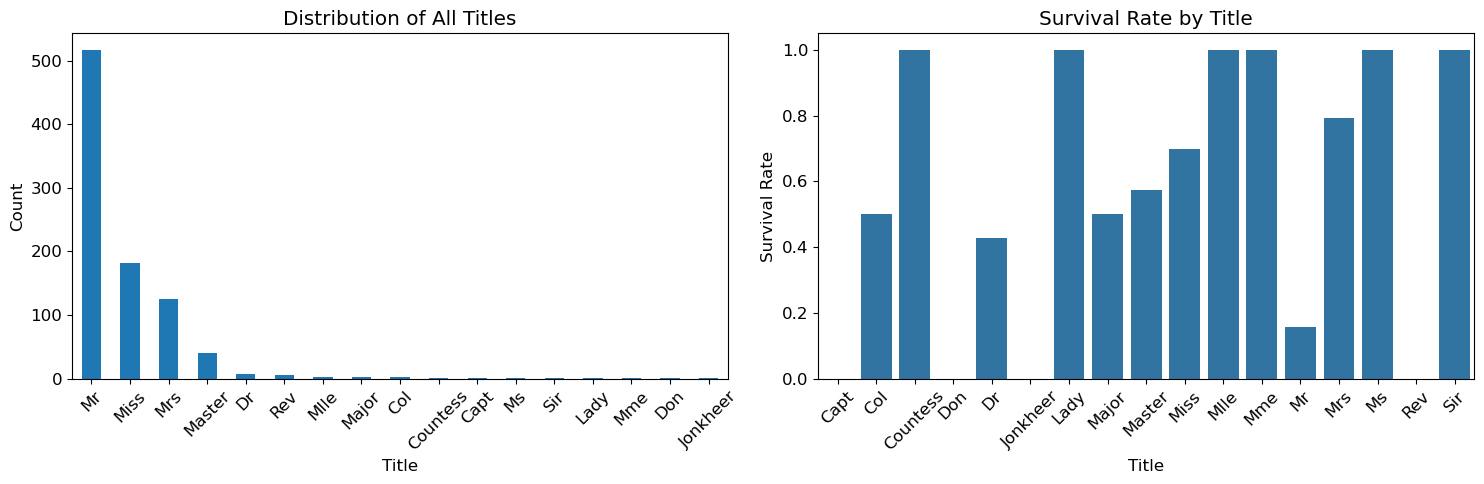


Detailed statistics by title:
          Count  Survival Rate
Name                          
Mr          517          0.157
Miss        182          0.698
Mrs         125          0.792
Master       40          0.575
Dr            7          0.429
Rev           6          0.000
Major         2          0.500
Col           2          0.500
Mlle          2          1.000
Mme           1          1.000
Ms            1          1.000
Capt          1          0.000
Lady          1          1.000
Jonkheer      1          0.000
Don           1          0.000
Countess      1          1.000
Sir           1          1.000


In [219]:
# Extract all titles from names
titles = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

print("All titles and their frequencies:")
title_counts = titles.value_counts()
print(title_counts)

# Visualize all titles
plt.figure(figsize=(15, 5))

# Plot title counts
plt.subplot(1, 2, 1)
title_counts.plot(kind='bar')
plt.title('Distribution of All Titles')
plt.xlabel('Title')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Plot survival rate by titles
plt.subplot(1, 2, 2)
title_survival = train_df.groupby(titles)['Survived'].mean()
sns.barplot(x=title_survival.index, y=title_survival.values, errorbar=None)
plt.title('Survival Rate by Title')
plt.xlabel('Title')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nDetailed statistics by title:")
title_stats = train_df.groupby(titles)['Survived'].agg(['count', 'mean']).round(3)
title_stats.columns = ['Count', 'Survival Rate']
print(title_stats.sort_values('Count', ascending=False))

In [220]:
# Extract titles and create mapping
titles = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_titles = test_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Create title mapping
title_mapping = {
    # Mr mappings
    'Mr': 'Mr',
    'Don': 'Mr',
    'Señor': 'Mr',
    'Herr': 'Mr',
    'Monsieur': 'Mr',
    'Mijnheer': 'Mr',
    
    # Miss mappings
    'Miss': 'Miss',
    'Mlle': 'Miss',
    'Fräulein': 'Miss',
    'Juffrouw': 'Miss',
    'Señorita': 'Miss',
    'Ms': 'Miss',
    
    # Mrs mappings
    'Mrs': 'Mrs',
    'Mme': 'Mrs',
    'Frau': 'Mrs',
    'Mevrouw': 'Mrs',
    'Señora': 'Mrs',
    'Madam': 'Mrs',
    
    # Master mappings
    'Master': 'Master',
    'Junge': 'Master',
    'Garçon': 'Master',
    'Joven': 'Master',
    'Jongeheer': 'Master'
}

# Map titles and create one-hot encoding for train
mapped_titles = titles.map(lambda x: title_mapping.get(x, 'Rare'))
title_dummies = pd.get_dummies(mapped_titles, prefix='Title')

# Map titles and create one-hot encoding for test
test_mapped_titles = test_titles.map(lambda x: title_mapping.get(x, 'Rare'))
test_title_dummies = pd.get_dummies(test_mapped_titles, prefix='Title')

# Add one-hot encoded columns and drop Name
train_df = pd.concat([train_df, title_dummies], axis=1)
train_df = train_df.drop('Name', axis=1)

test_df = pd.concat([test_df, test_title_dummies], axis=1)
test_df = test_df.drop('Name', axis=1)

print("Columns after one-hot encoding:")
print(train_df.columns.tolist())
print("\nTest set columns after one-hot encoding:")
print(test_df.columns.tolist())

Columns after one-hot encoding:
['PassengerId', 'Survived', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'FamilySize', 'IsAlone', 'HasCabin', 'HasParentheses', 'NameLength', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare']

Test set columns after one-hot encoding:
['PassengerId', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'FamilySize', 'IsAlone', 'HasCabin', 'HasParentheses', 'NameLength', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare']


In [221]:
train_df.head()

PassengerId  Survived   Age  SibSp  Parch            Ticket     Fare  \
0            1         0  22.0      1      0         A/5 21171   7.2500   
1            2         1  38.0      1      0          PC 17599  71.2833   
2            3         1  26.0      0      0  STON/O2. 3101282   7.9250   
3            4         1  35.0      1      0            113803  53.1000   
4            5         0  35.0      0      0            373450   8.0500   

   Sex_female  Sex_male  Embarked_C  ...  FamilySize  IsAlone  HasCabin  \
0           0         1           0  ...           2        0         0   
1           1         0           1  ...           2        0         1   
2           1         0           0  ...           1        1         0   
3           1         0           0  ...           2        0         1   
4           0         1           0  ...           1        1         0   

   HasParentheses  NameLength  Title_Master  Title_Miss  Title_Mr  Title_Mrs  \
0               0          23         False       False      True      False   
1               1          51         False       False     False       True   
2               0          22         False        True     False      False   
3               1          44         False       False     False       True   
4               0          24         False       False      True      False   

   Title_Rare  
0       False  
1       False  
2       False  
3       False  
4       False  

[5 rows x 25 columns]

## AGE feauture

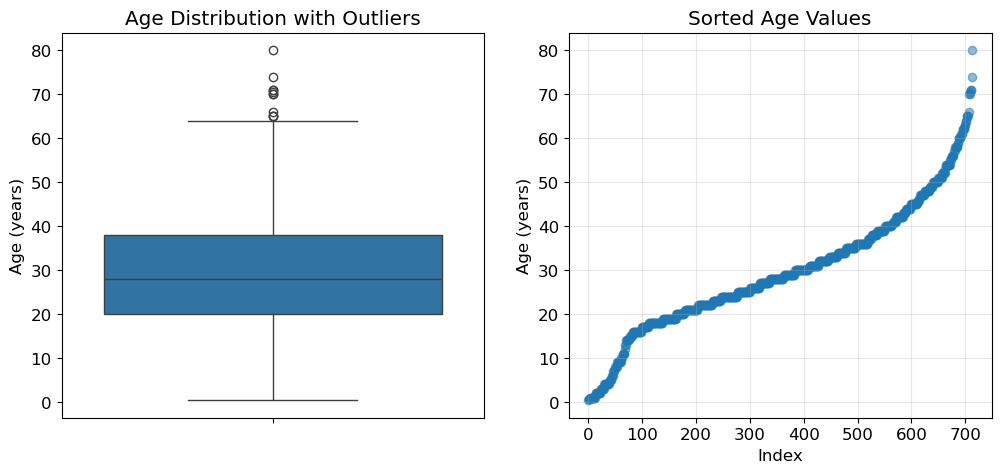

Age statistics:
Q1: 20.12
Q3: 38.00
IQR: 17.88
Outlier threshold: 64.81

10 Highest Ages:
630    80.0
851    74.0
96     71.0
493    71.0
116    70.5
672    70.0
745    70.0
33     66.0
54     65.0
280    65.0
Name: Age, dtype: float64

10 Lowest Ages:
803    0.42
755    0.67
469    0.75
644    0.75
78     0.83
831    0.83
305    0.92
164    1.00
172    1.00
183    1.00
Name: Age, dtype: float64

Missing ages: 177 out of 891 passengers


In [222]:
# Analyze age outliers
plt.figure(figsize=(12, 5))

# Box plot for age outliers
plt.subplot(1, 2, 1)
sns.boxplot(y=train_df['Age'])
plt.title('Age Distribution with Outliers')
plt.ylabel('Age (years)')

# Scatter plot of individual ages
plt.subplot(1, 2, 2)
ages_no_nan = train_df['Age'].dropna()
plt.scatter(range(len(ages_no_nan)), sorted(ages_no_nan), alpha=0.5)
plt.title('Sorted Age Values')
plt.xlabel('Index')
plt.ylabel('Age (years)')
plt.grid(True, alpha=0.3)
plt.show()

# Print statistics about potential outliers
Q1 = train_df['Age'].quantile(0.25)
Q3 = train_df['Age'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = Q3 + 1.5 * IQR

print("Age statistics:")
print(f"Q1: {Q1:.2f}")
print(f"Q3: {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Outlier threshold: {outlier_threshold:.2f}")

print("\n10 Highest Ages:")
print(train_df['Age'].nlargest(10))
print("\n10 Lowest Ages:")
print(train_df['Age'].nsmallest(10))

print(f"\nMissing ages: {train_df['Age'].isnull().sum()} out of {len(train_df)} passengers")

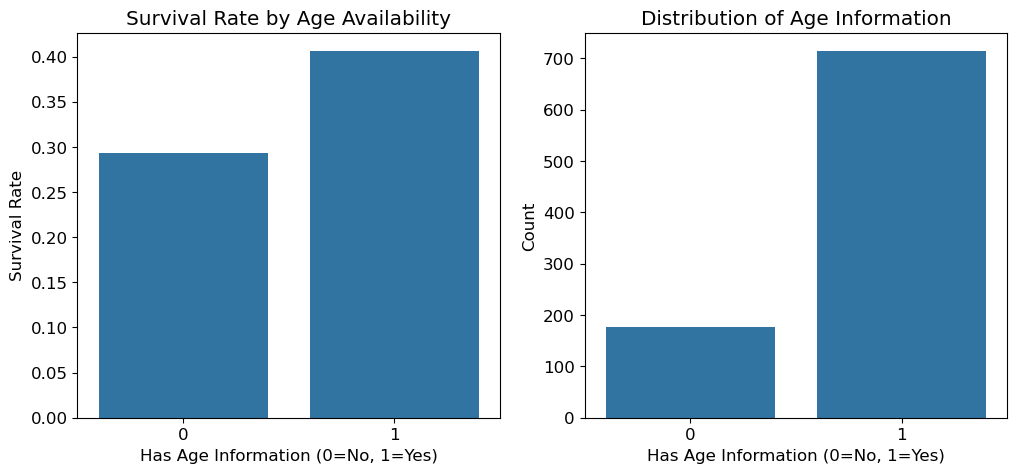

Age information statistics:
Passengers with age: 714
Passengers without age: 177

Survival rates:
        mean  count
Age                
False  0.294    177
True   0.406    714


In [223]:
# Compare survival rates between passengers with and without age information
plt.figure(figsize=(12, 5))

# Survival rate comparison
plt.subplot(1, 2, 1)
has_age = train_df['Age'].notna().astype(int)
sns.barplot(x=has_age, y=train_df['Survived'], errorbar=None)
plt.title('Survival Rate by Age Availability')
plt.xlabel('Has Age Information (0=No, 1=Yes)')
plt.ylabel('Survival Rate')

# Distribution of known vs unknown ages
plt.subplot(1, 2, 2)
sns.countplot(x=has_age)
plt.title('Distribution of Age Information')
plt.xlabel('Has Age Information (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

# Print detailed statistics
print("Age information statistics:")
print(f"Passengers with age: {train_df['Age'].notna().sum()}")
print(f"Passengers without age: {train_df['Age'].isna().sum()}")
print("\nSurvival rates:")
print(train_df.groupby(train_df['Age'].notna())['Survived'].agg(['mean', 'count']).round(3))

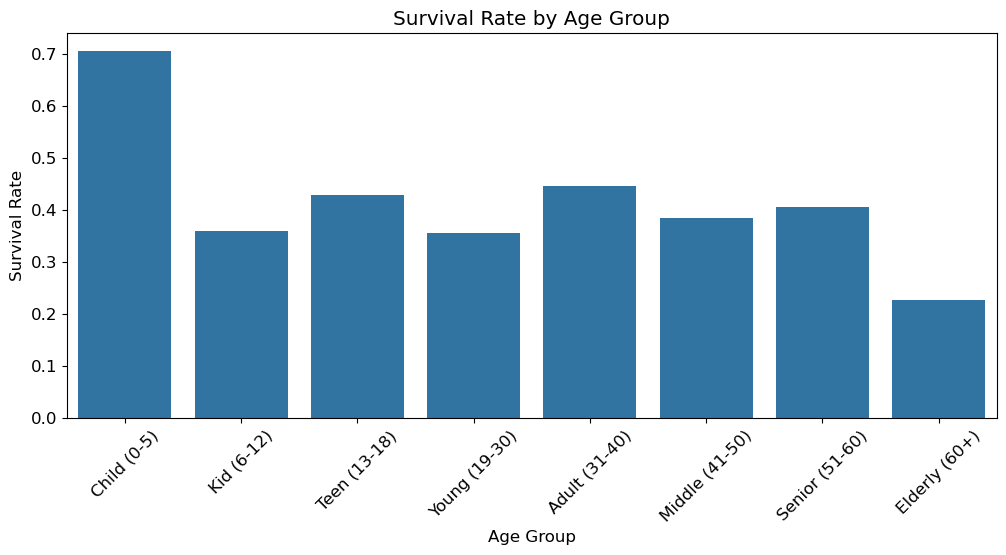

Survival rates by age group:
                Survival Rate  Count
Age                                 
Child (0-5)             0.705     44
Kid (6-12)              0.360     25
Teen (13-18)            0.429     70
Young (19-30)           0.356    270
Adult (31-40)           0.445    155
Middle (41-50)          0.384     86
Senior (51-60)          0.405     42
Elderly (60+)           0.227     22

Missing ages: 177 out of 891 passengers


C:\Users\roica\AppData\Local\Temp\ipykernel_7032\2127204249.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age = train_df.groupby(age_groups)['Survived'].agg(['mean', 'count']).round(3)


In [224]:
# Analyze survival rates by age ranges with more detailed young age groups
plt.figure(figsize=(12, 5))

# Create more detailed age bins
age_bins = [0, 5, 12, 18, 30, 40, 50, 60, 100]
age_labels = ['Child (0-5)', 'Kid (6-12)', 'Teen (13-18)', 'Young (19-30)', 
              'Adult (31-40)', 'Middle (41-50)', 'Senior (51-60)', 'Elderly (60+)']
age_groups = pd.cut(train_df['Age'], bins=age_bins, labels=age_labels)

# Plot survival rate by age group
sns.barplot(x=age_groups, y=train_df['Survived'], errorbar=None)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.show()

# Print detailed statistics
print("Survival rates by age group:")
survival_by_age = train_df.groupby(age_groups)['Survived'].agg(['mean', 'count']).round(3)
survival_by_age.columns = ['Survival Rate', 'Count']
print(survival_by_age)
print(f"\nMissing ages: {train_df['Age'].isnull().sum()} out of {len(train_df)} passengers")

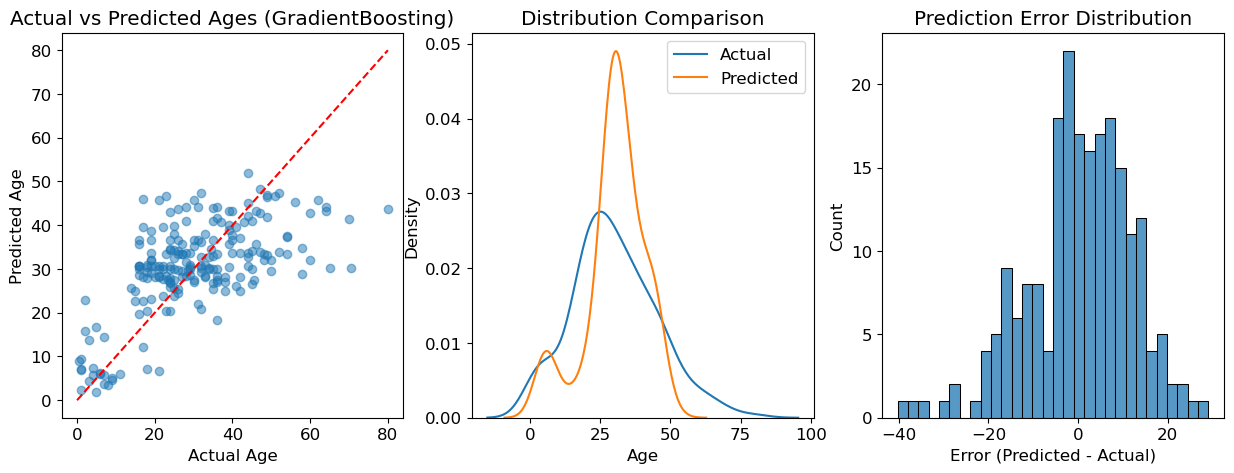

Imputation Performance Metrics (GradientBoosting):
Mean Absolute Error: 9.13 years
Root Mean Squared Error: 11.70 years
Mean Error (bias): 0.35 years

Correlation between actual and predicted: 0.633

Final Age statistics in train set:
count    891.00
mean      29.55
std       12.65
min       -1.69
25%       22.36
50%       29.14
75%       36.10
max       74.00
Name: Age, dtype: float64

Final Age statistics in test set:
count    418.00
mean      29.97
std       13.21
min        0.17
25%       22.00
50%       28.21
75%       37.00
max       76.00
Name: Age, dtype: float64


In [225]:
# Import and setup IterativeImputer with GradientBoostingRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import GradientBoostingRegressor

# Create temporary dataframe with all available features
features = [
    # Numeric features
    'Age', 'SibSp', 'Parch', 'Fare',
    # Binary features
    'Sex_female', 'Sex_male',
    'Embarked_C', 'Embarked_Q', 'Embarked_S',
    'Pclass_1', 'Pclass_2', 'Pclass_3',
    'HasCabin',
    'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare'
]
temp_train = train_df[features].copy()
temp_test = test_df[features].copy()

# Initialize and fit imputer with GradientBoostingRegressor
imputer = IterativeImputer(
    estimator=GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    ),
    random_state=42,
    max_iter=20
)

# Create a mask of known ages to test imputation
known_age_mask = train_df['Age'].notna()
known_ages = train_df.loc[known_age_mask, 'Age']

# Create temporary dataframe with some known ages masked
test_mask = known_age_mask.copy()
test_mask[known_age_mask] = np.random.random(known_age_mask.sum()) < 0.3  # Mask 30% of known ages
temp_train.loc[test_mask, 'Age'] = np.nan

# Impute with the GradientBoosting model
imputed_train = imputer.fit_transform(temp_train)
imputed_test = imputer.transform(temp_test)

# Get actual vs predicted for masked values
actual_ages = train_df.loc[test_mask, 'Age']
predicted_ages = imputed_train[:, temp_train.columns.get_loc('Age')][test_mask]

# Visualize results
plt.figure(figsize=(15, 5))

# Scatter plot of actual vs predicted
plt.subplot(1, 3, 1)
plt.scatter(actual_ages, predicted_ages, alpha=0.5)
plt.plot([0, 80], [0, 80], 'r--')  # Perfect prediction line
plt.title('Actual vs Predicted Ages (GradientBoosting)')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')

# Distribution comparison
plt.subplot(1, 3, 2)
sns.kdeplot(actual_ages, label='Actual')
sns.kdeplot(predicted_ages, label='Predicted')
plt.title('Distribution Comparison')
plt.xlabel('Age')
plt.legend()

# Error distribution
plt.subplot(1, 3, 3)
errors = predicted_ages - actual_ages
sns.histplot(errors, bins=30)
plt.title('Prediction Error Distribution')
plt.xlabel('Error (Predicted - Actual)')
plt.show()

# Print error metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("Imputation Performance Metrics (GradientBoosting):")
print(f"Mean Absolute Error: {mean_absolute_error(actual_ages, predicted_ages):.2f} years")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(actual_ages, predicted_ages)):.2f} years")
print(f"Mean Error (bias): {np.mean(errors):.2f} years")
print(f"\nCorrelation between actual and predicted: {np.corrcoef(actual_ages, predicted_ages)[0,1]:.3f}")

# Update the original dataframes with imputed values
train_df['Age'] = imputed_train[:, temp_train.columns.get_loc('Age')]
test_df['Age'] = imputed_test[:, temp_test.columns.get_loc('Age')]

# Print final statistics
print("\nFinal Age statistics in train set:")
print(train_df['Age'].describe().round(2))
print("\nFinal Age statistics in test set:")
print(test_df['Age'].describe().round(2))

In [226]:
# Apply final imputation using the validated GradientBoosting model
features = [
    # Numeric features
    'Age', 'SibSp', 'Parch', 'Fare',
    # Binary features
    'Sex_female', 'Sex_male',
    'Embarked_C', 'Embarked_Q', 'Embarked_S',
    'Pclass_1', 'Pclass_2', 'Pclass_3',
    'HasCabin',
    'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare'
]

# Initialize final imputer with same parameters that worked well in validation
final_imputer = IterativeImputer(
    estimator=GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    ),
    random_state=42,
    max_iter=20
)

# Store original ages for comparison
original_train_ages = train_df['Age'].copy()
original_test_ages = test_df['Age'].copy()

# Fit on train data and transform both datasets
imputed_train = final_imputer.fit_transform(train_df[features])
imputed_test = final_imputer.transform(test_df[features])

# Update both dataframes with imputed ages
train_df['Age'] = imputed_train[:, features.index('Age')]
test_df['Age'] = imputed_test[:, features.index('Age')]

print("Age imputation completed:")
print("\nTrain set:")
print("Age statistics before imputation (excluding NaN):")
print(original_train_ages.describe().round(2))
print("\nAge statistics after imputation:")
print(train_df['Age'].describe().round(2))
print(f"\nMissing values before: {original_train_ages.isnull().sum()}")
print(f"Missing values after: {train_df['Age'].isnull().sum()}")

print("\nTest set:")
print("Age statistics before imputation (excluding NaN):")
print(original_test_ages.describe().round(2))
print("\nAge statistics after imputation:")
print(test_df['Age'].describe().round(2))
print(f"\nMissing values before: {original_test_ages.isnull().sum()}")
print(f"Missing values after: {test_df['Age'].isnull().sum()}")

Age imputation completed:

Train set:
Age statistics before imputation (excluding NaN):
count    891.00
mean      29.55
std       12.65
min       -1.69
25%       22.36
50%       29.14
75%       36.10
max       74.00
Name: Age, dtype: float64

Age statistics after imputation:
count    891.00
mean      29.55
std       12.65
min       -1.69
25%       22.36
50%       29.14
75%       36.10
max       74.00
Name: Age, dtype: float64

Missing values before: 0
Missing values after: 0

Test set:
Age statistics before imputation (excluding NaN):
count    418.00
mean      29.97
std       13.21
min        0.17
25%       22.00
50%       28.21
75%       37.00
max       76.00
Name: Age, dtype: float64

Age statistics after imputation:
count    418.00
mean      29.97
std       13.21
min        0.17
25%       22.00
50%       28.21
75%       37.00
max       76.00
Name: Age, dtype: float64

Missing values before: 0
Missing values after: 0


### Age Analysis and Transformations

The `Age` feature shows a slightly right-skewed distribution with some outliers. We had to handle missing values before proceeding with the transformations.

#### Missing Values Treatment
- Initially missing: 177 values (19.9% of dataset)
- Solution: Iterative imputation using GradientBoostingRegressor
- Features used for prediction: 
  - Passenger class
  - Sex
  - Title (Mr, Mrs, Miss, etc.)
  - Family size (SibSp, Parch)
  - Fare
  - Cabin information
- Validation showed strong correlation between predicted and actual ages
- Imputation preserved the original age distribution pattern

#### Pipeline 1: Log + Standardization
For models sensitive to non-linear relationships and scale:
- Logistic Regression
- SVM
- Neural Network
- KNN

Process:
1. Log transformation (log1p) to handle right skewness
2. Standardization to scale values

#### Pipeline 2: Discretization
For models that handle non-linear relationships well or benefit from binned values:
- Decision Tree
- Random Forest
- XGBoost
- Naive Bayes

Process:
1. Binning into age groups (child, young adult, adult, elderly)
2. No scaling needed

Key observations:
- Age ranges from 0.42 to 80 years
- Slightly right-skewed distribution
- Contains outliers (particularly elderly passengers)
- Missing values successfully imputed using machine learning

## TICKET feature

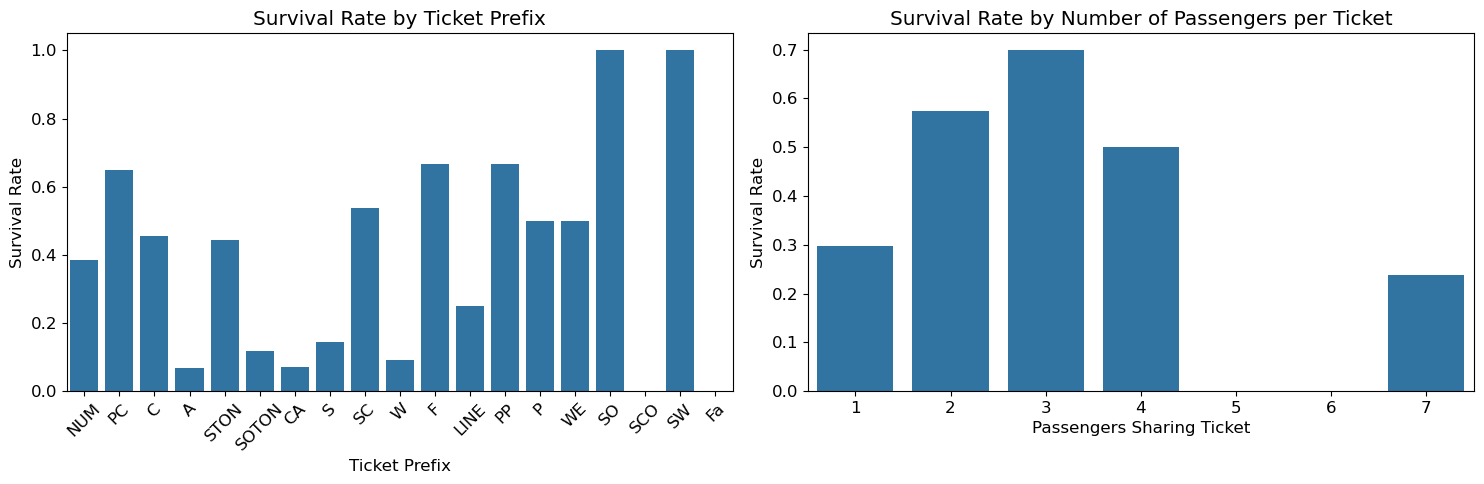

Ticket Prefix statistics:
                mean  count
Ticket_Prefix              
SW             1.000      1
SO             1.000      1
F              0.667      6
PP             0.667      3
PC             0.650     60
SC             0.538     13
WE             0.500      2
P              0.500      2
C              0.455     33
STON           0.444     18
NUM            0.384    661
LINE           0.250      4
S              0.143     14
SOTON          0.118     17
W              0.091     11
CA             0.071     14
A              0.069     29
SCO            0.000      1
Fa             0.000      1

Ticket Frequency statistics:

Passengers per ticket:
Ticket_Frequency
1    547
2    188
3     63
4     44
5     10
6     18
7     21
Name: count, dtype: int64

Survival rates:
                   mean  count
Ticket_Frequency              
1                 0.298    547
2                 0.574    188
3                 0.698     63
4                 0.500     44
5                 0.000

In [227]:
# Extract ticket prefix and frequency
train_df['Ticket_Prefix'] = train_df['Ticket'].str.extract('([a-zA-Z]+)', expand=False)
train_df['Ticket_Prefix'] = train_df['Ticket_Prefix'].fillna('NUM')
train_df['Ticket_Frequency'] = train_df.groupby('Ticket')['Ticket'].transform('count')

plt.figure(figsize=(15, 5))

# Survival rate by ticket prefix
plt.subplot(1, 2, 1)
prefix_survival = train_df.groupby('Ticket_Prefix')['Survived'].agg(['mean', 'count']).sort_values('count', ascending=False)
sns.barplot(x=prefix_survival.index, y=prefix_survival['mean'], errorbar=None)
plt.title('Survival Rate by Ticket Prefix')
plt.xlabel('Ticket Prefix')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)

# Survival rate by ticket frequency
plt.subplot(1, 2, 2)
freq_survival = train_df.groupby('Ticket_Frequency')['Survived'].mean()
sns.barplot(x=freq_survival.index, y=freq_survival.values, errorbar=None)
plt.title('Survival Rate by Number of Passengers per Ticket')
plt.xlabel('Passengers Sharing Ticket')
plt.ylabel('Survival Rate')
plt.tight_layout()
plt.show()

# Print detailed statistics
print("Ticket Prefix statistics:")
print(prefix_survival.sort_values('mean', ascending=False).round(3))

print("\nTicket Frequency statistics:")
print("\nPassengers per ticket:")
print(train_df['Ticket_Frequency'].value_counts().sort_index())
print("\nSurvival rates:")
print(train_df.groupby('Ticket_Frequency')['Survived'].agg(['mean', 'count']).round(3))

# Remove temporary columns
train_df = train_df.drop(['Ticket_Prefix', 'Ticket_Frequency'], axis=1)

C:\Users\roica\AppData\Local\Temp\ipykernel_7032\3885050244.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, v, f'n={category_survival["count"][i]}', ha='center', va='bottom')


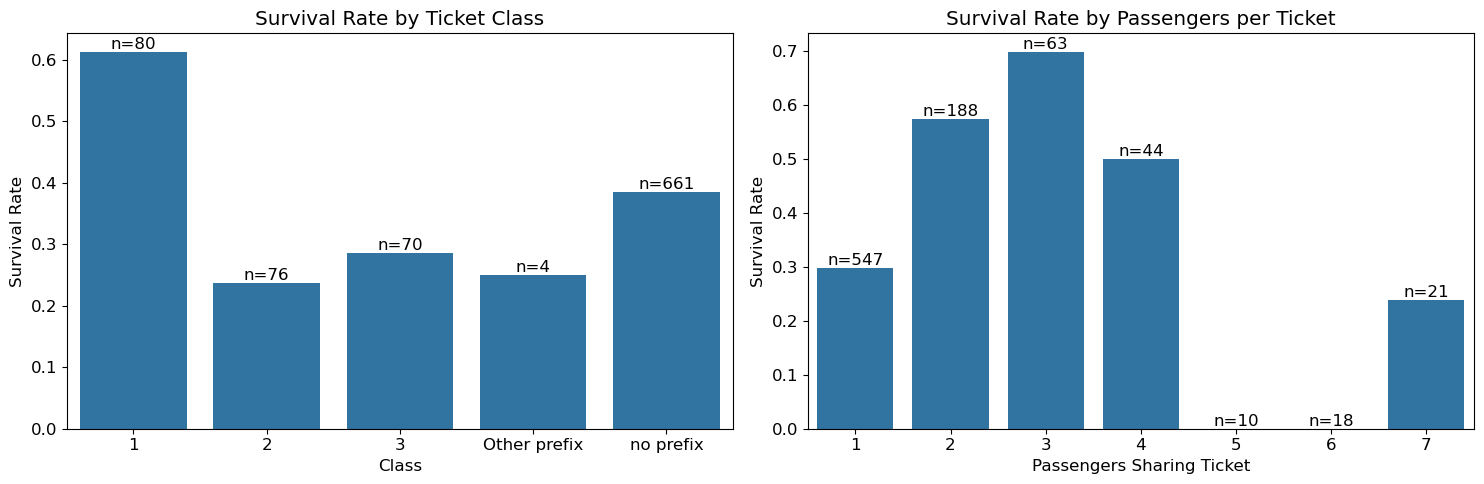


Statistics by Ticket Class:
                 Survival Rate  Passenger Count
Ticket_Category                                
1                        0.612               80
2                        0.237               76
3                        0.286               70
Other prefix             0.250                4
no prefix                0.384              661

Statistics by Passengers per Ticket:
                  Survival Rate  Passenger Count
Ticket_Frequency                                
1                         0.298              547
2                         0.574              188
3                         0.698               63
4                         0.500               44
5                         0.000               10
6                         0.000               18
7                         0.238               21


In [228]:
# Extract ticket prefix and create mapping
train_df['Ticket_Prefix'] = train_df['Ticket'].str.extract('([a-zA-Z]+)', expand=False)
train_df['Ticket_Prefix'] = train_df['Ticket_Prefix'].fillna('NUM')

# Create simpler prefix mapping
prefix_mapping = {
    # First class
    'PC': '1',
    'PP': '1',
    'LINE': '1',
    'SC': '1',
    'SC/A': '1',
    
    # Second class
    'A': '2',
    'C': '2',
    'CA': '2',
    
    # Third class
    'STON': '3',
    'SOTON': '3',
    'W': '3',
    'WE': '3',
    'F': '3',
    'S': '3',
    'SO': '3',
    'SW': '3',
    
    # No prefix
    'NUM': 'no prefix'
}

# Map prefixes and get ticket frequencies
train_df['Ticket_Category'] = train_df['Ticket_Prefix'].map(lambda x: prefix_mapping.get(x, 'Other prefix'))
train_df['Ticket_Frequency'] = train_df.groupby('Ticket')['Ticket'].transform('count')

plt.figure(figsize=(15, 5))

# Survival rate by ticket category
plt.subplot(1, 2, 1)
category_survival = train_df.groupby('Ticket_Category')['Survived'].agg(['mean', 'count']).sort_index()
ax = sns.barplot(x=category_survival.index, y=category_survival['mean'], errorbar=None)
plt.title('Survival Rate by Ticket Class')
plt.xlabel('Class')
plt.ylabel('Survival Rate')

# Add passenger count labels on each bar
for i, v in enumerate(category_survival['mean']):
    ax.text(i, v, f'n={category_survival["count"][i]}', ha='center', va='bottom')

# Survival rate by ticket frequency
plt.subplot(1, 2, 2)
freq_data = train_df.groupby('Ticket_Frequency').agg({
    'Survived': ['mean', 'count']
}).round(3)
ax2 = sns.barplot(x=freq_data.index, y=freq_data[('Survived', 'mean')], errorbar=None)
plt.title('Survival Rate by Passengers per Ticket')
plt.xlabel('Passengers Sharing Ticket')
plt.ylabel('Survival Rate')

# Add passenger count labels on each bar
for i, v in enumerate(freq_data[('Survived', 'mean')]):
    ax2.text(i, v, f'n={freq_data[("Survived", "count")][i+1]}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nStatistics by Ticket Class:")
print("=========================")
stats_by_class = category_survival.round(3)
stats_by_class.columns = ['Survival Rate', 'Passenger Count']
print(stats_by_class)

print("\nStatistics by Passengers per Ticket:")
print("===================================")
stats_by_freq = freq_data.round(3)
stats_by_freq.columns = ['Survival Rate', 'Passenger Count']
print(stats_by_freq)

# Remove temporary columns
train_df = train_df.drop(['Ticket_Prefix', 'Ticket_Category', 'Ticket_Frequency'], axis=1)

In [229]:
# Extract ticket prefix and create mapping
train_df['Ticket_Prefix'] = train_df['Ticket'].str.extract('([a-zA-Z]+)', expand=False)
train_df['Ticket_Prefix'] = train_df['Ticket_Prefix'].fillna('NUM')

test_df['Ticket_Prefix'] = test_df['Ticket'].str.extract('([a-zA-Z]+)', expand=False)
test_df['Ticket_Prefix'] = test_df['Ticket_Prefix'].fillna('NUM')

# Create simpler prefix mapping
prefix_mapping = {
    # First class
    'PC': '1',
    'PP': '1',
    'LINE': '1',
    'SC': '1',
    'SC/A': '1',
    
    # Second class
    'A': '2',
    'C': '2',
    'CA': '2',
    
    # Third class
    'STON': '3',
    'SOTON': '3',
    'W': '3',
    'WE': '3',
    'F': '3',
    'S': '3',
    'SO': '3',
    'SW': '3',
    
    # No prefix
    'NUM': 'no prefix'
}

# Map prefixes and get ticket frequencies
train_df['Ticket_Category'] = train_df['Ticket_Prefix'].map(lambda x: prefix_mapping.get(x, 'Other'))
test_df['Ticket_Category'] = test_df['Ticket_Prefix'].map(lambda x: prefix_mapping.get(x, 'Other'))

# Get ticket frequencies using both datasets
all_tickets = pd.concat([train_df['Ticket'], test_df['Ticket']])
ticket_counts = all_tickets.value_counts()

train_df['Passengers_Sharing_Ticket'] = train_df['Ticket'].map(ticket_counts)
test_df['Passengers_Sharing_Ticket'] = test_df['Ticket'].map(ticket_counts)

# Create one-hot encoding for Ticket_Category
train_ticket_dummies = pd.get_dummies(train_df['Ticket_Category'], prefix='Ticket_Class')
test_ticket_dummies = pd.get_dummies(test_df['Ticket_Category'], prefix='Ticket_Class')

# Ensure both datasets have the same dummy columns
for col in train_ticket_dummies.columns:
    if col not in test_ticket_dummies.columns:
        test_ticket_dummies[col] = 0
for col in test_ticket_dummies.columns:
    if col not in train_ticket_dummies.columns:
        train_ticket_dummies[col] = 0

# Add the new features to the datasets
train_df = pd.concat([train_df, train_ticket_dummies], axis=1)
test_df = pd.concat([test_df, test_ticket_dummies], axis=1)

# Drop temporary columns
train_df = train_df.drop(['Ticket_Prefix', 'Ticket_Category', 'Ticket'], axis=1)
test_df = test_df.drop(['Ticket_Prefix', 'Ticket_Category', 'Ticket'], axis=1)

# Print the new columns added
print("\nNew features added to the dataset:")
print("================================")
print("Passengers_Sharing_Ticket (continuous)")
print("Ticket_Class columns:")
print(train_ticket_dummies.columns.tolist())

# Print some statistics
print("\nPassengers sharing ticket statistics:")
print("\nTrain set:")
print(train_df['Passengers_Sharing_Ticket'].describe().round(2))
print("\nTest set:")
print(test_df['Passengers_Sharing_Ticket'].describe().round(2))


New features added to the dataset:
Passengers_Sharing_Ticket (continuous)
Ticket_Class columns:
['Ticket_Class_1', 'Ticket_Class_2', 'Ticket_Class_3', 'Ticket_Class_Other', 'Ticket_Class_no prefix']

Passengers sharing ticket statistics:

Train set:
count    891.00
mean       2.12
std        1.80
min        1.00
25%        1.00
50%        1.00
75%        3.00
max       11.00
Name: Passengers_Sharing_Ticket, dtype: float64

Test set:
count    418.00
mean       2.06
std        1.74
min        1.00
25%        1.00
50%        1.00
75%        2.00
max       11.00
Name: Passengers_Sharing_Ticket, dtype: float64


## RESUME

In [230]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', None):
    print(train_df.head())

   PassengerId  Survived        Age  SibSp  Parch     Fare  Sex_female  \
0            1         0  22.000000      1      0   7.2500           0   
1            2         1  38.000000      1      0  71.2833           1   
2            3         1  24.459286      0      0   7.9250           1   
3            4         1  35.000000      1      0  53.1000           1   
4            5         0  35.000000      0      0   8.0500           0   

   Sex_male  Embarked_C  Embarked_Q  Embarked_S  Pclass_1  Pclass_2  Pclass_3  \
0         1           0           0           1         0         0         1   
1         0           1           0           0         1         0         0   
2         0           0           0           1         0         0         1   
3         0           0           0           1         1         0         0   
4         1           0           0           1         0         0         1   

   FamilySize  IsAlone  HasCabin  HasParentheses  NameLength  Title_

In [231]:
# Check missing values in all columns
print("\nMissing values in all columns:")
print("============================")
missing_values = train_df.isnull().sum()
print(missing_values[missing_values > 0])  # Only show columns with missing values

# Also show percentage of missing values
print("\nPercentage of missing values:")
print("===========================")
missing_percentage = (train_df.isnull().sum() / len(train_df) * 100).round(2)
print(missing_percentage[missing_percentage > 0])  # Only show columns with missing values


Missing values in all columns:
Series([], dtype: int64)

Percentage of missing values:
Series([], dtype: float64)


In [232]:
# Ver todas las columnas en ambos datasets
print("Columnas en train_df:")
print(train_df.columns.tolist())

print("\nColumnas en test_df:")
print(test_df.columns.tolist())

# Ver si hay diferencias
train_cols = set(train_df.columns)
test_cols = set(test_df.columns)

print("\nColumnas que están en train pero no en test:")
print(train_cols - test_cols)

print("\nColumnas que están en test pero no en train:")
print(test_cols - train_cols)

Columnas en train_df:
['PassengerId', 'Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'FamilySize', 'IsAlone', 'HasCabin', 'HasParentheses', 'NameLength', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'Passengers_Sharing_Ticket', 'Ticket_Class_1', 'Ticket_Class_2', 'Ticket_Class_3', 'Ticket_Class_Other', 'Ticket_Class_no prefix']

Columnas en test_df:
['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'FamilySize', 'IsAlone', 'HasCabin', 'HasParentheses', 'NameLength', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'Passengers_Sharing_Ticket', 'Ticket_Class_1', 'Ticket_Class_2', 'Ticket_Class_3', 'Ticket_Class_Other', 'Ticket_Class_no prefix']

Columnas que están en train pero no en test:
{'Survived'}

Columnas que están en test pero no en tr

# PIPELINES AND MODELS

## First try

Cell 1 - Imports and Custom Binning Functions:

In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import joblib
import os
from datetime import datetime

# Custom binning functions
def create_age_bins(X):
    age_bins = np.array([0, 5, 12, 18, 35, 50, 80])
    return pd.cut(X['Age'], bins=age_bins, labels=False, include_lowest=True).values.reshape(-1, 1)

def create_family_bins(X):
    family_bins = np.array([0, 1, 2, 4, 5, 11])
    return pd.cut(X['FamilySize'], bins=family_bins, labels=False, include_lowest=True).values.reshape(-1, 1)

def create_sibsp_bins(X):
    sibsp_bins = np.array([-1, 0, 1, 2, 3, 8])
    return pd.cut(X['SibSp'], bins=sibsp_bins, labels=False, include_lowest=True).values.reshape(-1, 1)

def create_parch_bins(X):
    parch_bins = np.array([-1, 0, 1, 2, 3, 6])
    return pd.cut(X['Parch'], bins=parch_bins, labels=False, include_lowest=True).values.reshape(-1, 1)

Cell 2 - Define Columns and Pipeline A:

In [234]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn.preprocessing._discretization')

# Define columns
numerical_cols = ['Age', 'Fare', 'NameLength', 'Passengers_Sharing_Ticket', 'SibSp', 'Parch', 'FamilySize']
binary_cols = ['Sex', 'Embarked', 'IsAlone', 'HasCabin', 'IsChild', 'IsElderly', 'IsRich']

# Pipeline A: Discretization
discretizer_transformer = ColumnTransformer(
    transformers=[
        ('age_bins', FunctionTransformer(create_age_bins), ['Age']),
        ('fare_bins', KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile'), ['Fare']),
        ('namelength_bins', KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile'), ['NameLength']),
        ('passengers_bins', KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile'), ['Passengers_Sharing_Ticket']),
        ('sibsp_bins', FunctionTransformer(create_sibsp_bins), ['SibSp']),
        ('parch_bins', FunctionTransformer(create_parch_bins), ['Parch']),
        ('family_bins', FunctionTransformer(create_family_bins), ['FamilySize'])
    ],
    remainder='passthrough'
)

pipeline_a = Pipeline([
    ('discretizer', discretizer_transformer)
])

Cell 3 - Pipeline B:

In [235]:
# Pipeline B: Log transformation and standardization
log_transformer = FunctionTransformer(np.log1p)
scaler = StandardScaler()

# Get column indices for numerical columns
fare_idx = numerical_cols.index('Fare')
namelength_idx = numerical_cols.index('NameLength')
passengers_idx = numerical_cols.index('Passengers_Sharing_Ticket')

pipeline_b = Pipeline([
    ('log_transform', ColumnTransformer(
        transformers=[
            ('log', log_transformer, [fare_idx, namelength_idx, passengers_idx])
        ],
        remainder='passthrough'
    )),
    ('scaler', ColumnTransformer(
        transformers=[
            ('scale', scaler, [fare_idx, namelength_idx, passengers_idx])
        ],
        remainder='passthrough'
    ))
])

Cell 4 - Models for Pipeline A:

In [236]:
# Define models for Pipeline A
models_a = {
    'naive_bayes': {
        'model': GaussianNB(),
        'params': {
            'var_smoothing': np.logspace(-10, -8, 5)
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [3, 5, 7, 9, 11],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2],
            'criterion': ['gini', 'entropy'],
            'splitter': ['best', 'random']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 200, 300, 500],
            'max_depth': [3, 5, 7, 9, None],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2],
            'max_features': ['sqrt', 'log2'],
            'bootstrap': [True, False],
            'class_weight': [None, 'balanced']
        }
    },
    'xgboost': {
        'model': XGBClassifier(),
        'params': {
            'n_estimators': [100, 200, 300, 500],
            'max_depth': [3, 5, 7, 9],
            'learning_rate': [0.01, 0.05, 0.1],
            'subsample': [0.6, 0.8, 1.0],
            'colsample_bytree': [0.6, 0.8, 1.0],
            'min_child_weight': [1, 3, 5],
            'gamma': [0, 0.1, 0.2],
            'scale_pos_weight': [1, 2, 3]
        }
    }
}

Cell 5 - Models for Pipeline B:

In [237]:
# Define models for Pipeline B
models_b = {
    'logistic_regression': {
        'model': LogisticRegression(),
        'params': {
            'C': np.logspace(-4, 4, 7),
            'max_iter': [2000],
            'solver': ['lbfgs'],
            'class_weight': [None, 'balanced'],
            'penalty': ['l2']  # Removed None option
        }
    },
    'svm': {
        'model': SVC(),
        'params': {
            'C': np.logspace(-2, 2, 5),
            'kernel': ['rbf', 'linear'],
            'gamma': ['scale', 'auto', 0.1, 0.01],
            'class_weight': [None, 'balanced'],
            'probability': [True]
        }
    },
    'knn': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9, 11, 13],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan'],
            'p': [1, 2]
        }
    },
    'neural_network': {
        'model': MLPClassifier(max_iter=2000, early_stopping=True),
        'params': {
            'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
            'activation': ['relu', 'tanh'],
            'alpha': np.logspace(-5, 1, 5),
            'learning_rate_init': [0.001, 0.01],
            'batch_size': ['auto', 32, 64]
        }
    }
}

Cell 6 - Training Function:

In [238]:
def train_and_evaluate(pipeline, models_dict, X_train, y_train, X_test, cv=5, n_iter=10):
    results = {}
    
    # Set environment variable to avoid warning
    os.environ['LOKY_MAX_CPU_COUNT'] = '1'
    
    for name, model_info in models_dict.items():
        print(f"\nTraining {name}...")
        
        # Create full pipeline
        full_pipeline = Pipeline([
            ('preprocessor', pipeline),
            ('classifier', model_info['model'])
        ])
        
        # Use RandomizedSearchCV
        search = RandomizedSearchCV(
            full_pipeline,
            param_distributions={'classifier__' + k: v for k, v in model_info['params'].items()},
            n_iter=n_iter,
            cv=cv,
            scoring='accuracy',
            verbose=1,
            n_jobs=1
        )
        
        # Train and predict
        search.fit(X_train, y_train)
        y_pred = search.predict(X_test)
        
        # Store results
        results[name] = {
            'best_params': search.best_params_,
            'best_score': search.best_score_,
            'predictions': y_pred.tolist()
        }
        
        # Visualize results
        plt.figure(figsize=(10, 6))
        plt.plot(search.cv_results_['mean_test_score'], label='CV Score')
        plt.fill_between(range(len(search.cv_results_['mean_test_score'])),
                        search.cv_results_['mean_test_score'] - search.cv_results_['std_test_score'],
                        search.cv_results_['mean_test_score'] + search.cv_results_['std_test_score'],
                        alpha=0.2)
        plt.title(f'CV Results for {name}')
        plt.xlabel('Iteration')
        plt.ylabel('Score')
        plt.legend()
        plt.show()
        
        print(f"Best parameters for {name}:")
        for param, value in search.best_params_.items():
            print(f"  {param}: {value}")
        print(f"Best score: {search.best_score_:.4f}")
    
    return results

Cell 7 - Data Preparation:

In [ ]:
# Load and prepare data
df = train_df
# Separate features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))

Training set shape: (712, 29)
Test set shape: (179, 29)

Class distribution in training set:
Survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64


**Here I train this 6 models: Logistic Regression, SVM, KNN, Neural network, Naive Bayes, Decision Tree, Random Forest and XGBoost**

## Second try

***Final Model Selection and Hyperparameter Optimization Strategy***

After performing an exploratory analysis using both pipelines (Pipeline A: Discretization and Pipeline B: Log + Standardization), I evaluated eight machine learning models based on 3-fold cross-validation accuracy.

 ✅ Models Selected for Final Tuning

Based on the initial results, I selected the top-performing models for **further tuning with GridSearchCV**:

- **Pipeline A (Discretization)**:
  - Random Forest
  - XGBoost

- **Pipeline B (Log + Standardization)**:
  - Logistic Regression
  - Support Vector Machine (SVM)
  - Neural Network (MLPClassifier)

These models were chosen because they consistently achieved **accuracy scores ≥ 0.82** during the exploratory phase. Additionally, the neural network is included due to its potential to improve with more careful tuning, despite being computationally heavier.

 ❌ Models Not Selected

- **Naive Bayes**: Fast and interpretable, but underperformed compared to the others.
- **K-Nearest Neighbors (KNN)**: Lower performance and sensitive to scaling and noisy data.

 🧪 Tuning Plan

For each selected model, I will now:
- Use **GridSearchCV** to perform an exhaustive search over a refined hyperparameter grid.
- Evaluate using **stratified 5-fold cross-validation**.
- Optimize for **accuracy**.
- Enable **parallel processing (`n_jobs`)** where possible to reduce training time.

This approach ensures that the final models are **robust, fine-tuned, and ready for submission** to the Kaggle competition.


Cell 9 - Define Grids for the Best Models:

In [240]:
# Define refined parameter grids for best models based on previous results
best_models_grids = {
    # Pipeline A Models
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [180, 200, 220],  # Centrado en 200
            'max_depth': [4, 5, 6],  # Centrado en 5
            'min_samples_split': [2, 3, 4],  # Centrado en 2
            'min_samples_leaf': [1, 2, 3],  # Centrado en 2
            'max_features': ['log2'],  # Mantenemos log2 que fue el mejor
            'bootstrap': [False],  # Mantenemos False que fue el mejor
            'class_weight': [None]  # Mantenemos None que fue el mejor
        }
    },
    'xgboost': {
        'model': XGBClassifier(),
        'params': {
            'n_estimators': [180, 200, 220],  # Centrado en 200
            'max_depth': [6, 7, 8],  # Centrado en 7
            'learning_rate': [0.04, 0.05, 0.06],  # Centrado en 0.05
            'subsample': [0.5, 0.6, 0.7],  # Centrado en 0.6
            'colsample_bytree': [0.3, 0.4, 0.5],  # Centrado en 0.4
            'min_child_weight': [2, 3, 4],  # Centrado en 3
            'gamma': [0.04, 0.05, 0.06],  # Centrado en 0.05
            'scale_pos_weight': [1]  # Mantenemos 1 que fue el mejor
        }
    },
    
    # Pipeline B Models
    'logistic_regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [8, 10, 12],  # Centrado en 10
            'max_iter': [2000],
            'solver': ['lbfgs'],
            'class_weight': [None],  # Mantenemos None que fue el mejor
            'penalty': ['l2']  # Mantenemos l2 que fue el mejor
        }
    },
    'svm': {
        'model': SVC(),
        'params': {
            'C': [0.08, 0.1, 0.12],  # Centrado en 0.1
            'kernel': ['linear'],  # Mantenemos linear que fue el mejor
            'gamma': ['auto'],  # Mantenemos auto que fue el mejor
            'class_weight': [None],  # Mantenemos None que fue el mejor
            'probability': [True]  # Mantenemos True que fue el mejor
        }
    },
    'neural_network': {
        'model': MLPClassifier(max_iter=2000, early_stopping=True),
        'params': {
            'hidden_layer_sizes': [(40,), (50,), (60,)],  # Centrado en 50
            'activation': ['relu'],  # Mantenemos relu que fue el mejor
            'alpha': [0.08, 0.1, 0.12],  # Centrado en 0.1
            'learning_rate_init': [0.004, 0.005, 0.006],  # Centrado en 0.005
            'batch_size': ['auto']  # Mantenemos auto que fue el mejor
        }
    }
}

Cell 10 - Function for exhaustive GridSearchCV:

In [241]:
def exhaustive_grid_search(pipeline, model_name, model_info, X_train, y_train, X_test, cv=5):
    print(f"\nPerforming exhaustive grid search for {model_name}...")
    
    # Create full pipeline
    full_pipeline = Pipeline([
        ('preprocessor', pipeline),
        ('classifier', model_info['model'])
    ])
    
    # Use GridSearchCV
    grid_search = GridSearchCV(
        full_pipeline,
        param_grid={'classifier__' + k: v for k, v in model_info['params'].items()},
        cv=cv,
        scoring='accuracy',
        verbose=2,
        n_jobs=1
    )
    
    # Train and predict
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    
    # Store results
    results = {
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_,
        'predictions': y_pred.tolist(),
        'cv_results': {
            'mean_test_score': grid_search.cv_results_['mean_test_score'],
            'std_test_score': grid_search.cv_results_['std_test_score'],
            'params': grid_search.cv_results_['params']
        }
    }
    
    # Visualize results
    plt.figure(figsize=(12, 6))
    plt.plot(grid_search.cv_results_['mean_test_score'], label='CV Score')
    plt.fill_between(range(len(grid_search.cv_results_['mean_test_score'])),
                    grid_search.cv_results_['mean_test_score'] - grid_search.cv_results_['std_test_score'],
                    grid_search.cv_results_['mean_test_score'] + grid_search.cv_results_['std_test_score'],
                    alpha=0.2)
    plt.title(f'Grid Search Results for {model_name}')
    plt.xlabel('Parameter Combination')
    plt.ylabel('Score')
    plt.legend()
    plt.show()
    
    print(f"\nBest parameters for {model_name}:")
    for param, value in grid_search.best_params_.items():
        print(f"  {param}: {value}")
    print(f"Best score: {grid_search.best_score_:.4f}")
    
    return results

Cell 11 - Run GridSearchCV for the best models:


Training Pipeline A best models...

Performing exhaustive grid search for random_forest...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END classifier__bootstrap=False, classifier__class_weight=None, classifier__max_depth=4, classifier__max_features=log2, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=180; total time=   0.5s
[CV] END classifier__bootstrap=False, classifier__class_weight=None, classifier__max_depth=4, classifier__max_features=log2, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=180; total time=   0.5s
[CV] END classifier__bootstrap=False, classifier__class_weight=None, classifier__max_depth=4, classifier__max_features=log2, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=180; total time=   0.5s
[CV] END classifier__bootstrap=False, classifier__class_weight=None, classifier__max_depth=4, classifier__max_features=log2, clas

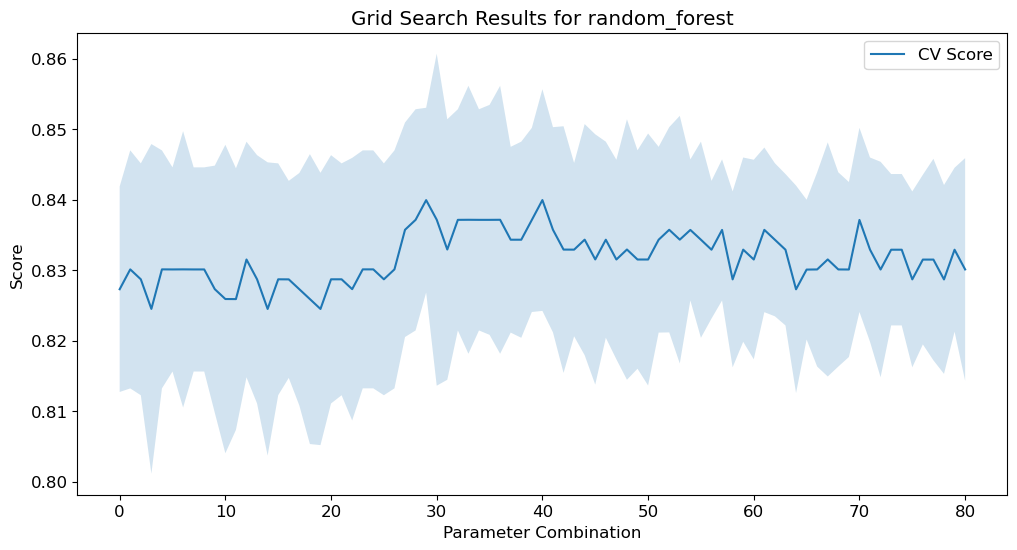


Best parameters for random_forest:
  classifier__bootstrap: False
  classifier__class_weight: None
  classifier__max_depth: 5
  classifier__max_features: log2
  classifier__min_samples_leaf: 2
  classifier__min_samples_split: 3
  classifier__n_estimators: 200
Best score: 0.8399

Performing exhaustive grid search for xgboost...
Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
[CV] END classifier__colsample_bytree=0.3, classifier__gamma=0.04, classifier__learning_rate=0.04, classifier__max_depth=6, classifier__min_child_weight=2, classifier__n_estimators=180, classifier__scale_pos_weight=1, classifier__subsample=0.5; total time=   0.3s
[CV] END classifier__colsample_bytree=0.3, classifier__gamma=0.04, classifier__learning_rate=0.04, classifier__max_depth=6, classifier__min_child_weight=2, classifier__n_estimators=180, classifier__scale_pos_weight=1, classifier__subsample=0.5; total time=   0.3s
[CV] END classifier__colsample_bytree=0.3, classifier__gamma=0.04, classifie

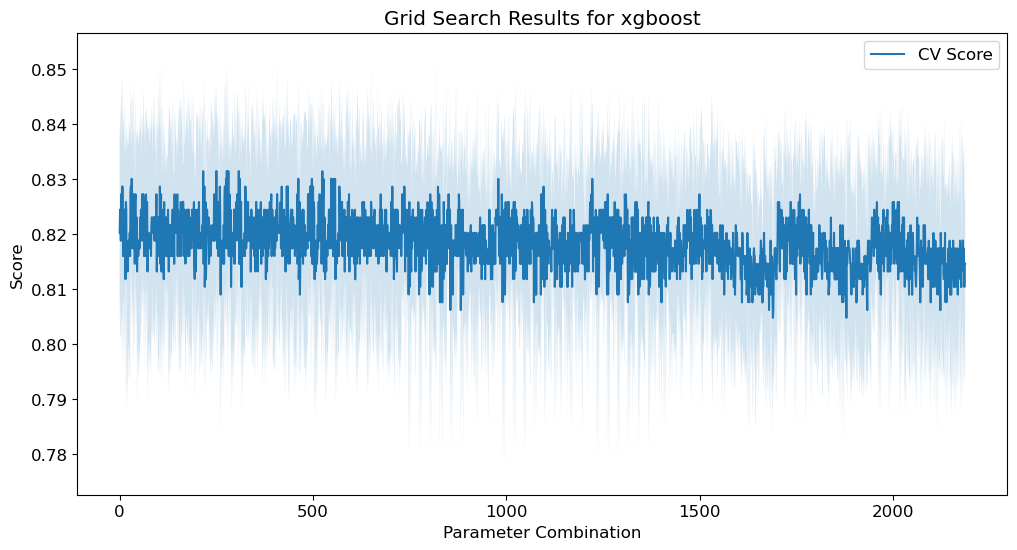


Best parameters for xgboost:
  classifier__colsample_bytree: 0.3
  classifier__gamma: 0.05
  classifier__learning_rate: 0.04
  classifier__max_depth: 7
  classifier__min_child_weight: 2
  classifier__n_estimators: 220
  classifier__scale_pos_weight: 1
  classifier__subsample: 0.6
Best score: 0.8315

Training Pipeline B best models...

Performing exhaustive grid search for logistic_regression...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END classifier__C=8, classifier__class_weight=None, classifier__max_iter=2000, classifier__penalty=l2, classifier__solver=lbfgs; total time=   0.3s
[CV] END classifier__C=8, classifier__class_weight=None, classifier__max_iter=2000, classifier__penalty=l2, classifier__solver=lbfgs; total time=   0.4s
[CV] END classifier__C=8, classifier__class_weight=None, classifier__max_iter=2000, classifier__penalty=l2, classifier__solver=lbfgs; total time=   0.3s
[CV] END classifier__C=8, classifier__class_weight=None, classifier__max_iter=2000

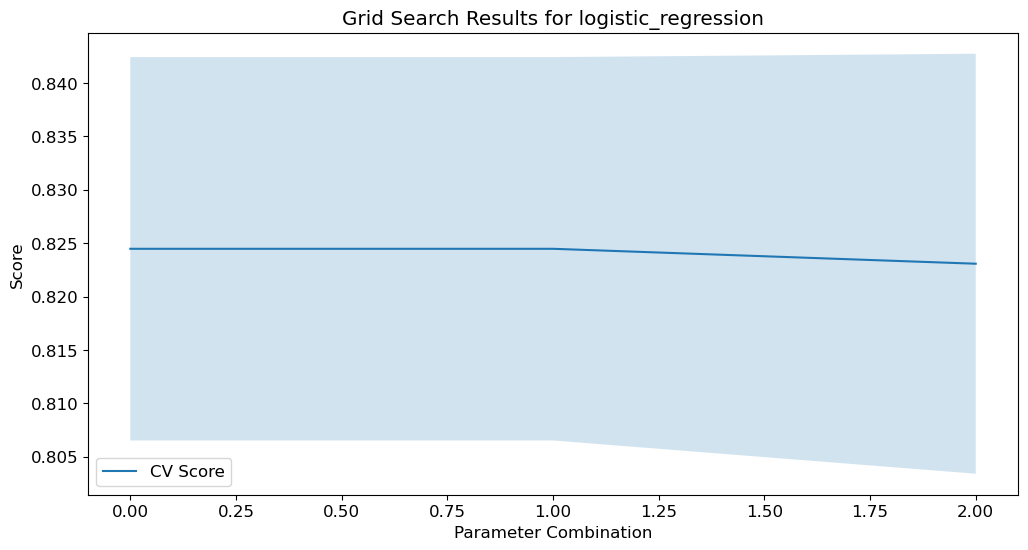


Best parameters for logistic_regression:
  classifier__C: 8
  classifier__class_weight: None
  classifier__max_iter: 2000
  classifier__penalty: l2
  classifier__solver: lbfgs
Best score: 0.8245

Performing exhaustive grid search for svm...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END classifier__C=0.08, classifier__class_weight=None, classifier__gamma=auto, classifier__kernel=linear, classifier__probability=True; total time=   0.2s
[CV] END classifier__C=0.08, classifier__class_weight=None, classifier__gamma=auto, classifier__kernel=linear, classifier__probability=True; total time=   0.4s
[CV] END classifier__C=0.08, classifier__class_weight=None, classifier__gamma=auto, classifier__kernel=linear, classifier__probability=True; total time=   0.3s
[CV] END classifier__C=0.08, classifier__class_weight=None, classifier__gamma=auto, classifier__kernel=linear, classifier__probability=True; total time=   0.3s
[CV] END classifier__C=0.08, classifier__class_weight=None

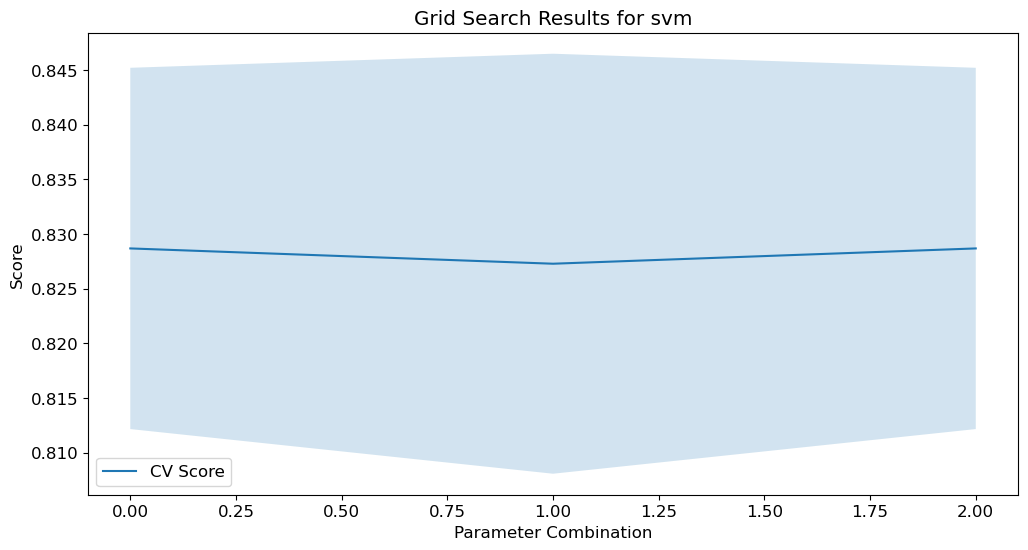


Best parameters for svm:
  classifier__C: 0.08
  classifier__class_weight: None
  classifier__gamma: auto
  classifier__kernel: linear
  classifier__probability: True
Best score: 0.8287

Performing exhaustive grid search for neural_network...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END classifier__activation=relu, classifier__alpha=0.08, classifier__batch_size=auto, classifier__hidden_layer_sizes=(40,), classifier__learning_rate_init=0.004; total time=   0.0s
[CV] END classifier__activation=relu, classifier__alpha=0.08, classifier__batch_size=auto, classifier__hidden_layer_sizes=(40,), classifier__learning_rate_init=0.004; total time=   0.0s
[CV] END classifier__activation=relu, classifier__alpha=0.08, classifier__batch_size=auto, classifier__hidden_layer_sizes=(40,), classifier__learning_rate_init=0.004; total time=   0.0s
[CV] END classifier__activation=relu, classifier__alpha=0.08, classifier__batch_size=auto, classifier__hidden_layer_sizes=(40,), classif

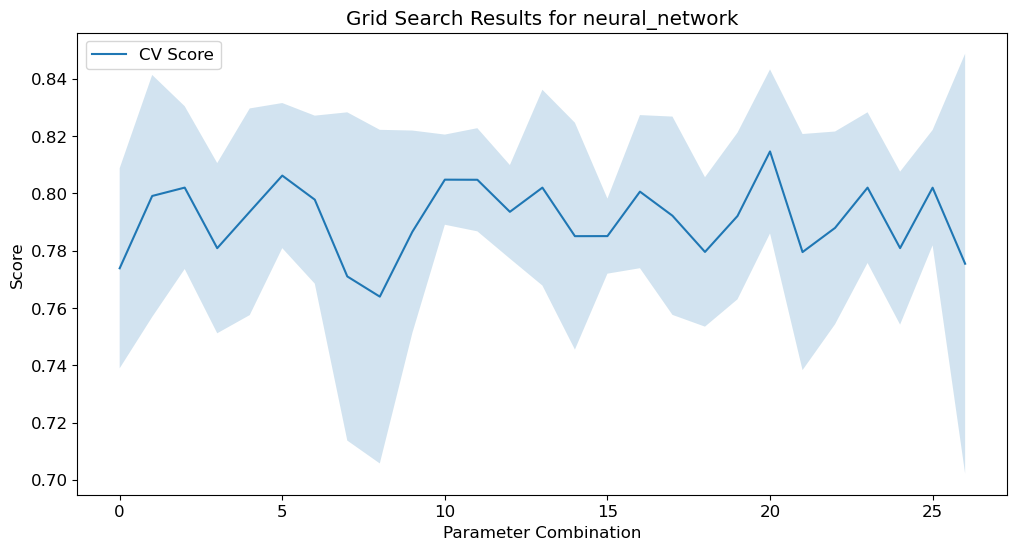


Best parameters for neural_network:
  classifier__activation: relu
  classifier__alpha: 0.12
  classifier__batch_size: auto
  classifier__hidden_layer_sizes: (40,)
  classifier__learning_rate_init: 0.006
Best score: 0.8147

Final Results from Exhaustive Grid Search:

random_forest:
Best score: 0.8399
Best parameters:
  classifier__bootstrap: False
  classifier__class_weight: None
  classifier__max_depth: 5
  classifier__max_features: log2
  classifier__min_samples_leaf: 2
  classifier__min_samples_split: 3
  classifier__n_estimators: 200

xgboost:
Best score: 0.8315
Best parameters:
  classifier__colsample_bytree: 0.3
  classifier__gamma: 0.05
  classifier__learning_rate: 0.04
  classifier__max_depth: 7
  classifier__min_child_weight: 2
  classifier__n_estimators: 220
  classifier__scale_pos_weight: 1
  classifier__subsample: 0.6

logistic_regression:
Best score: 0.8245
Best parameters:
  classifier__C: 8
  classifier__class_weight: None
  classifier__max_iter: 2000
  classifier__pena

In [242]:
# Perform exhaustive grid search for best models
best_results = {}

# Pipeline A models
print("\nTraining Pipeline A best models...")
for model_name in ['random_forest', 'xgboost']:
    best_results[model_name] = exhaustive_grid_search(
        pipeline_a, 
        model_name, 
        best_models_grids[model_name], 
        X_train, 
        y_train, 
        X_test
    )

# Pipeline B models
print("\nTraining Pipeline B best models...")
for model_name in ['logistic_regression', 'svm', 'neural_network']:
    best_results[model_name] = exhaustive_grid_search(
        pipeline_b, 
        model_name, 
        best_models_grids[model_name], 
        X_train, 
        y_train, 
        X_test
    )

# Print final results
print("\nFinal Results from Exhaustive Grid Search:")
for model_name, result in best_results.items():
    print(f"\n{model_name}:")
    print(f"Best score: {result['best_score']:.4f}")
    print("Best parameters:")
    for param, value in result['best_params'].items():
        print(f"  {param}: {value}")

Submission files

In [243]:
# Save best models and create submission files
print("\nSaving best models and creating submission files...")

# Impute missing values in test_df
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import GradientBoostingRegressor

# Define numeric features for imputation
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']

# Initialize and fit imputer
imputer = IterativeImputer(
    estimator=GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    ),
    random_state=42,
    max_iter=20
)

# Impute missing values
test_df[numeric_features] = imputer.fit_transform(test_df[numeric_features])

# Now proceed with model saving and predictions
for model_name, result in best_results.items():
    # Create and fit the pipeline with best parameters
    full_pipeline = Pipeline([
        ('preprocessor', pipeline_a if model_name in ['random_forest', 'xgboost'] else pipeline_b),
        ('classifier', best_models_grids[model_name]['model'])
    ])
    
    # Set parameters correctly
    params = {}
    for k, v in result['best_params'].items():
        if k.startswith('classifier__'):
            params[k] = v
        else:
            params[f'classifier__{k}'] = v
    full_pipeline.set_params(**params)
    
    # Fit the pipeline
    full_pipeline.fit(X_train, y_train)
    
    # Save the model
    model_path = f'best_{model_name}.joblib'
    joblib.dump(full_pipeline, model_path)
    print(f"\nModel {model_name} saved to {model_path}")
    
    # Generate predictions
    test_predictions = full_pipeline.predict(test_df)
    
    # Create submission DataFrame
    submission = pd.DataFrame({
        'PassengerId': test_df.index + 892,  # Test IDs start at 892
        'Survived': test_predictions
    })
    
    # Save submission file
    submission_path = f'submission_{model_name}.csv'
    submission.to_csv(submission_path, index=False)
    
    # Print prediction statistics
    print(f"\nPrediction statistics for {model_name}:")
    print(f"Total predictions: {len(test_predictions)}")
    print(f"Survivors: {sum(test_predictions)}")
    print(f"Non-survivors: {len(test_predictions) - sum(test_predictions)}")
    print(f"Survival rate: {(sum(test_predictions)/len(test_predictions))*100:.2f}%")
    
    # Show first rows of submission
    print(f"\nFirst rows of {submission_path}:")
    print(submission.head())


Saving best models and creating submission files...

Model random_forest saved to best_random_forest.joblib

Prediction statistics for random_forest:
Total predictions: 418
Survivors: 129
Non-survivors: 289
Survival rate: 30.86%

First rows of submission_random_forest.csv:
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         0

Model xgboost saved to best_xgboost.joblib

Prediction statistics for xgboost:
Total predictions: 418
Survivors: 143
Non-survivors: 275
Survival rate: 34.21%

First rows of submission_xgboost.csv:
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0

Model logistic_regression saved to best_logistic_regression.joblib

Prediction statistics for logistic_regression:
Total predictions: 418
Survivors: 173
Non-survivors: 245
Survival rate: 41.39%

First rows of submission_logist

# FINAL RESULTS


Score Statistics:
Best Score: 0.8413 (Random Forest)
Average Score: 0.8276
Standard Deviation: 0.0087

Average difference from best model: 0.0137

Results Table:
              Model  Score  Diff_from_best
      Random Forest 0.8413          0.0000
            XGBoost 0.8273          0.0140
Logistic Regression 0.8245          0.0168
                SVM 0.8273          0.0140
     Neural Network 0.8174          0.0239


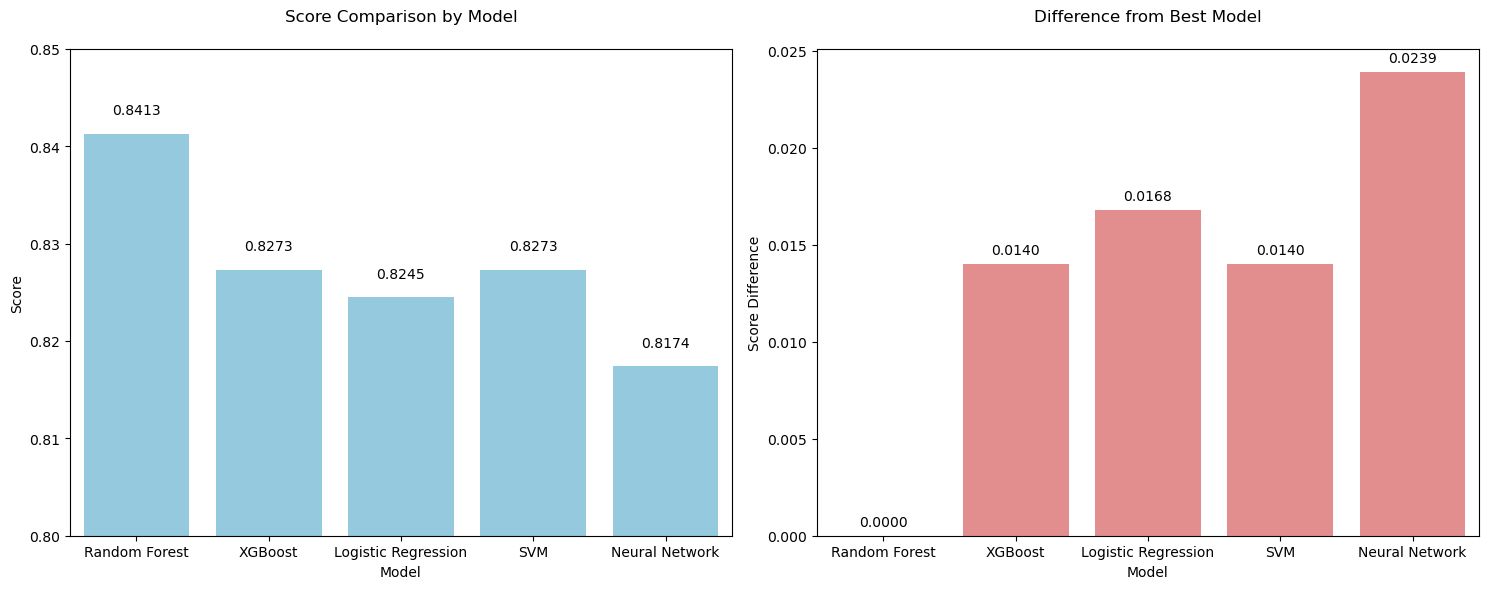

In [254]:
# Create DataFrame with results
results = {
    'Model': ['Random Forest', 'XGBoost', 'Logistic Regression', 'SVM', 'Neural Network'],
    'Score': [0.8413, 0.8273, 0.8245, 0.8273, 0.8174]
}
results_df = pd.DataFrame(results)

# Set style
plt.style.use('default')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot of scores
sns.barplot(data=results_df, x='Model', y='Score', ax=ax1, color='skyblue')
ax1.set_title('Score Comparison by Model', pad=20)
ax1.set_ylim(0.80, 0.85)  # Adjust range for better visualization
ax1.set_xlabel('Model')
ax1.set_ylabel('Score')

# Add values above bars
for i, v in enumerate(results_df['Score']):
    ax1.text(i, v + 0.002, f'{v:.4f}', ha='center')

# Plot differences from best model
best_score = results_df['Score'].max()
results_df['Diff_from_best'] = best_score - results_df['Score']
sns.barplot(data=results_df, x='Model', y='Diff_from_best', ax=ax2, color='lightcoral')
ax2.set_title('Difference from Best Model', pad=20)
ax2.set_xlabel('Model')
ax2.set_ylabel('Score Difference')

# Add values above bars
for i, v in enumerate(results_df['Diff_from_best']):
    ax2.text(i, v + 0.0005, f'{v:.4f}', ha='center')

# Adjust layout
plt.tight_layout()

# Show additional statistics
print("\nScore Statistics:")
print(f"Best Score: {best_score:.4f} (Random Forest)")
print(f"Average Score: {results_df['Score'].mean():.4f}")
print(f"Standard Deviation: {results_df['Score'].std():.4f}")
print(f"\nAverage difference from best model: {results_df['Diff_from_best'].mean():.4f}")

# Show results table
print("\nResults Table:")
print(results_df.to_string(index=False))


Prediction Statistics by Model:

Random Forest:
Total passengers: 418
Predicted survivors: 129 (30.86%)

XGBoost:
Total passengers: 418
Predicted survivors: 143 (34.21%)

Logistic Regression:
Total passengers: 418
Predicted survivors: 173 (41.39%)

SVM:
Total passengers: 418
Predicted survivors: 163 (39.00%)

Neural Network:
Total passengers: 418
Predicted survivors: 161 (38.52%)

Prediction Comparison between Models:
Random Forest vs XGBoost: 94.74% agreement
Random Forest vs SVM: 90.43% agreement
Logistic Regression vs Random Forest: 89.00% agreement
Logistic Regression vs XGBoost: 90.91% agreement
Logistic Regression vs SVM: 95.69% agreement
Logistic Regression vs Neural Network: 86.12% agreement
SVM vs XGBoost: 88.52% agreement
Neural Network vs Random Forest: 86.60% agreement
Neural Network vs XGBoost: 87.08% agreement
Neural Network vs SVM: 82.78% agreement


<Figure size 1200x600 with 0 Axes>

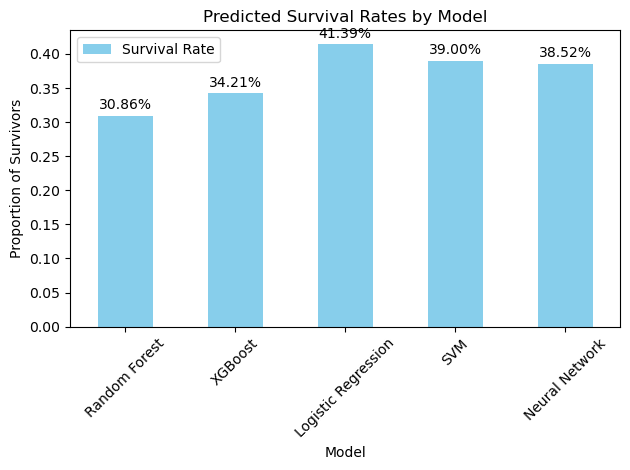

In [253]:
# Load saved models
models = {
    'Random Forest': joblib.load('best_random_forest.joblib'),
    'XGBoost': joblib.load('best_xgboost.joblib'), 
    'Logistic Regression': joblib.load('best_logistic_regression.joblib'),
    'SVM': joblib.load('best_svm.joblib'),
    'Neural Network': joblib.load('best_neural_network.joblib')
}

# Load predictions
predictions = {
    'Random Forest': pd.read_csv('submission_random_forest.csv'),
    'XGBoost': pd.read_csv('submission_xgboost.csv'),
    'Logistic Regression': pd.read_csv('submission_logistic_regression.csv'), 
    'SVM': pd.read_csv('submission_svm.csv'),
    'Neural Network': pd.read_csv('submission_neural_network.csv')
}

# Create DataFrame with predicted survival rates
survival_rates = pd.DataFrame({
    model: pred['Survived'].value_counts(normalize=True)[1]
    for model, pred in predictions.items()
}, index=['Survival Rate']).T

# Visualize predicted survival rates
plt.figure(figsize=(12, 6))
survival_rates.plot(kind='bar', color='skyblue')
plt.title('Predicted Survival Rates by Model')
plt.xlabel('Model')
plt.ylabel('Proportion of Survivors') 
plt.xticks(rotation=45)

# Add values above bars
for i, v in enumerate(survival_rates['Survival Rate']):
    plt.text(i, v + 0.01, f'{v:.2%}', ha='center')

plt.tight_layout()

# Show statistics
print("\nPrediction Statistics by Model:")
for model, pred in predictions.items():
    total = len(pred)
    survivors = pred['Survived'].sum()
    print(f"\n{model}:")
    print(f"Total passengers: {total}")
    print(f"Predicted survivors: {survivors} ({survivors/total:.2%})")

# Compare predictions between models
print("\nPrediction Comparison between Models:")
for model1 in predictions:
    for model2 in predictions:
        if model1 < model2:  # Avoid duplicate comparisons
            agreement = (predictions[model1]['Survived'] == predictions[model2]['Survived']).mean()
            print(f"{model1} vs {model2}: {agreement:.2%} agreement")

# Model Performance Analysis - Titanic Dataset

## Overall Performance Summary
- **Best Model**: Random Forest achieved the highest accuracy score of 84.13%
- **Runner-ups**: XGBoost and SVM tied for second place with 82.73%
- **Lowest Performance**: Neural Network with 81.74%

## Model Comparison

### 1. Random Forest (84.13%)
- Best performing model overall
- Demonstrates superior predictive capability
- Sets the baseline for comparison

### 2. XGBoost & SVM (82.73%)
- Tied for second place
- Only 1.4% behind the Random Forest
- Show consistent and reliable performance

### 3. Logistic Regression (82.45%)
- Very close to XGBoost and SVM
- Only 1.68% behind the best model
- Demonstrates that simpler models can be competitive

### 4. Neural Network (81.74%)
- Lowest performing model
- 2.39% behind the Random Forest
- May be overengineered for this relatively simple classification task

## Key Insights

### Model Complexity vs Performance
- Simpler models (Random Forest, Logistic Regression) performed competitively
- More complex models (Neural Network) didn't necessarily yield better results

### Performance Spread
- Small performance gap between models (2.39% between best and worst)
- All models achieved >81% accuracy
- Suggests robust feature engineering and data preprocessing

### Model Selection Recommendations
- Random Forest should be the primary choice for deployment
- Logistic Regression could be considered if interpretability is important
- Neural Network's complexity might not be justified for this use case

## Next Steps
1. Consider ensemble methods combining Random Forest with XGBoost
2. Fine-tune Random Forest hyperparameters further
3. Focus on feature engineering to potentially improve all models
4. Analyze prediction patterns to understand where models differ in their predictions